In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
df2 = pd.read_excel('C:\\Users\\user\\Downloads\\lp-winsorized-with-incomeclass.xlsx')
df = pd.read_excel('C:\\Users\\user\\Downloads\\HAQ-winsorized-with-incomeclass.xlsx')

In [3]:
df.head()

Country  Year      HAQ_w  IC                     Region
0  Argentina  2000  76.100000  UM  Latin America & Caribbean
1  Argentina  2005  77.200000  UM  Latin America & Caribbean
2  Argentina  2010  79.600000  UM  Latin America & Caribbean
3  Argentina  2015  81.900000  UM  Latin America & Caribbean
4  Argentina  2019  59.876111  UM  Latin America & Caribbean

In [4]:
df2.head()

Country  Year       LP_w  IC                     Region
0  Argentina  2000  23.287077  UM  Latin America & Caribbean
1  Argentina  2005  21.956108  UM  Latin America & Caribbean
2  Argentina  2010  27.548946  UM  Latin America & Caribbean
3  Argentina  2015  30.041763  UM  Latin America & Caribbean
4  Argentina  2019  33.711970  UM  Latin America & Caribbean

In [5]:
country_col = "Country"
region_col = "Region"
year_col = "Year"
haq_col = "HAQ_w"
income_col = "IC"
labor_col = "LP_w"


In [11]:
income_clean_map = {
    "high income": "High income",
    "upper middle income": "Upper middle income",
    "lower middle income": "Lower middle income",
    "low income": "Low income",
    "h": "High income",
    "um": "Upper middle income",
    "lm": "Lower middle income",
    "l": "Low income"
}

df[income_col] = df[income_col].str.strip().str.lower().map(income_clean_map)


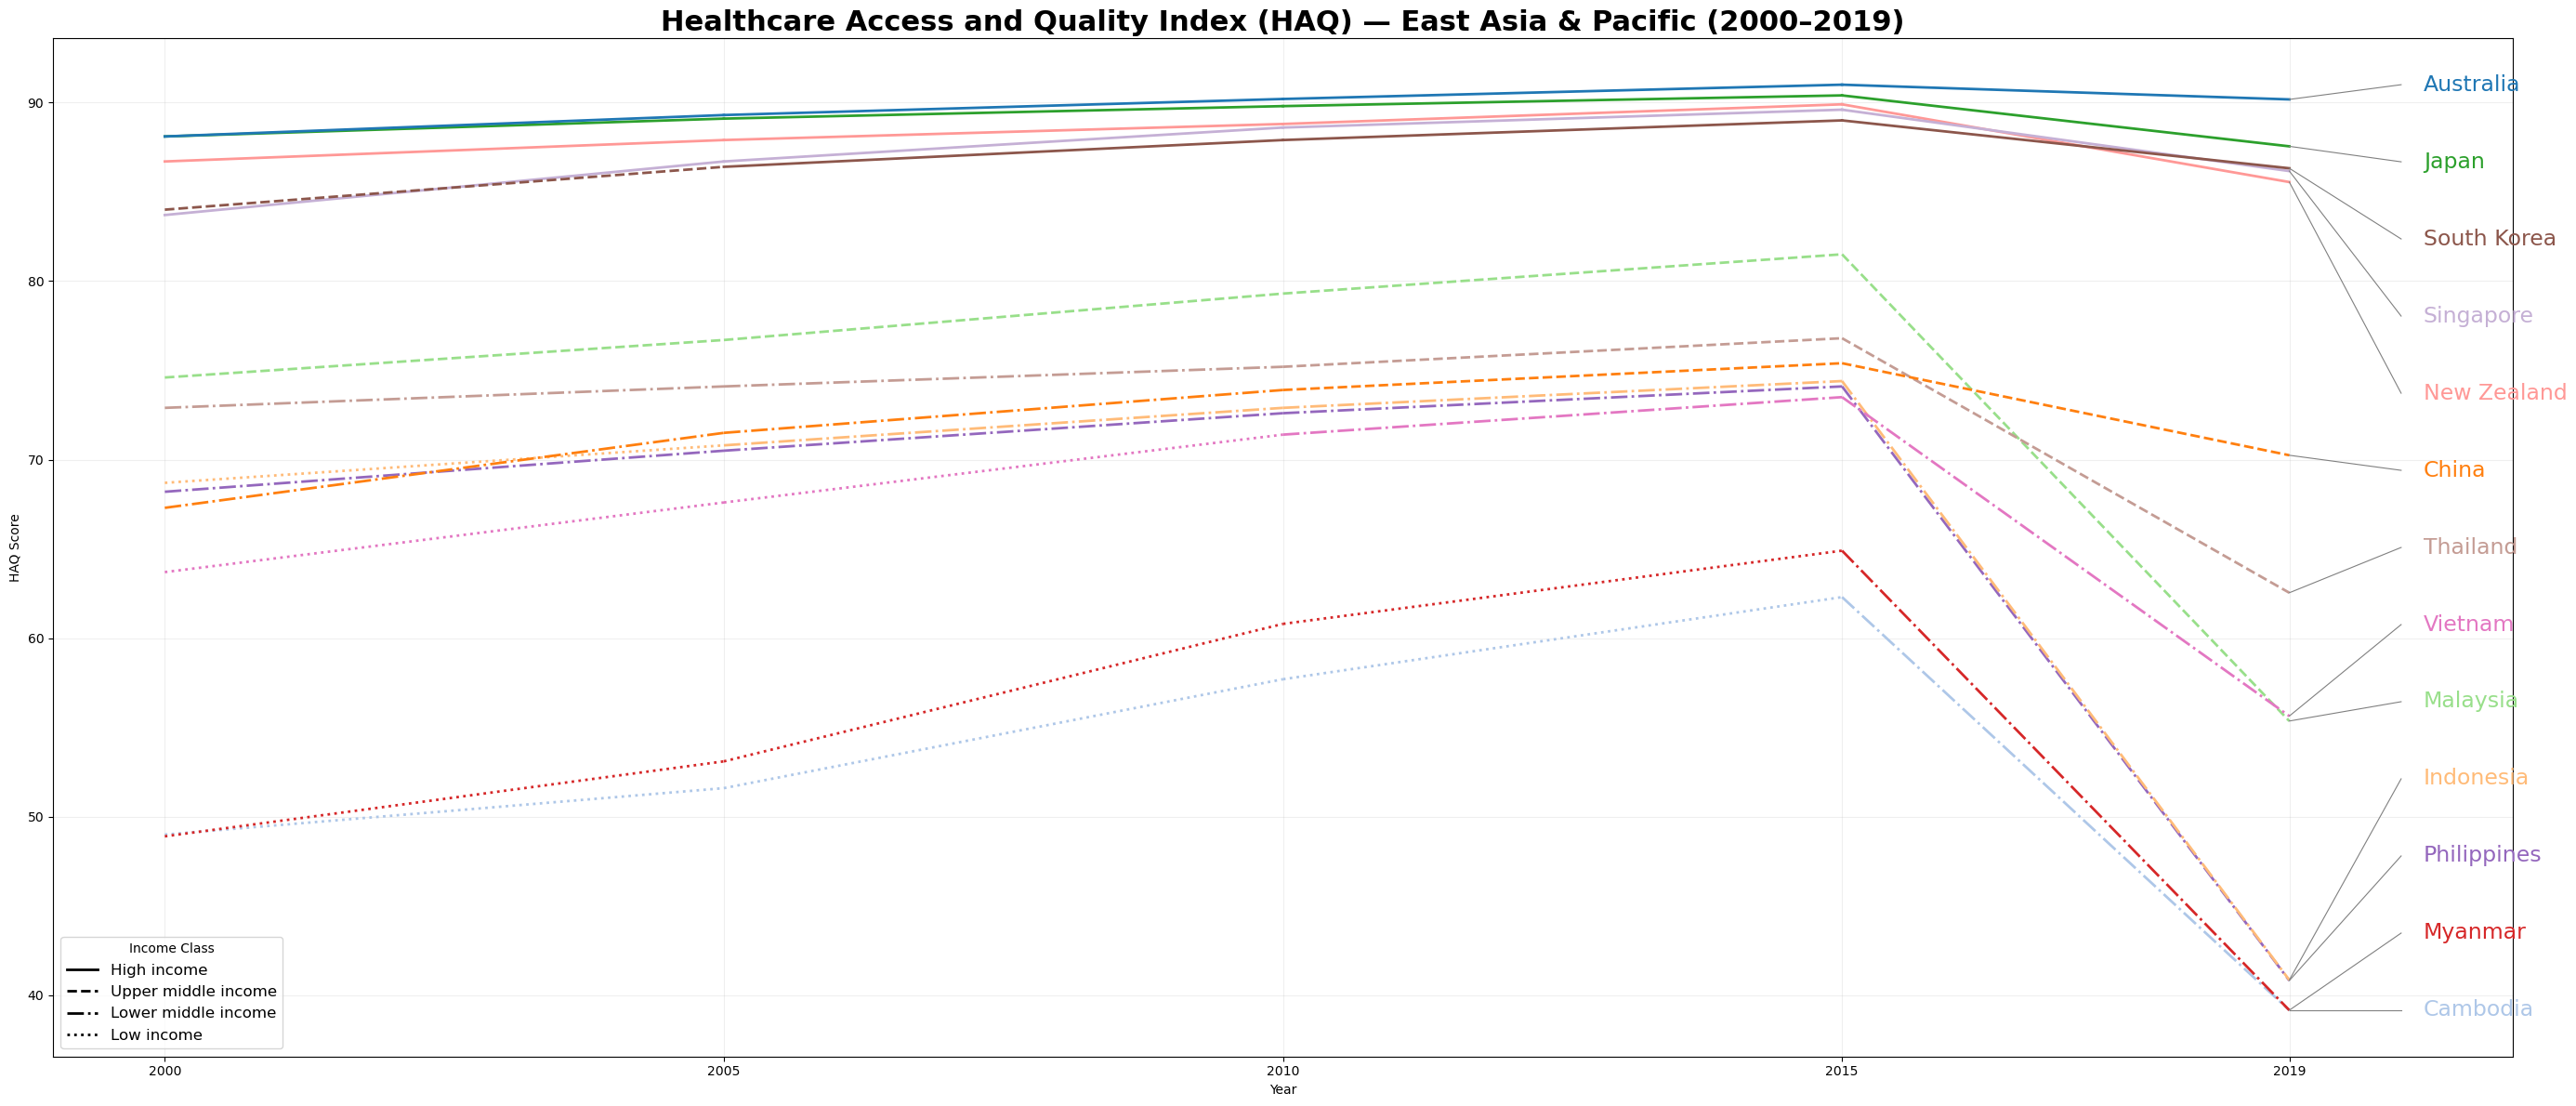

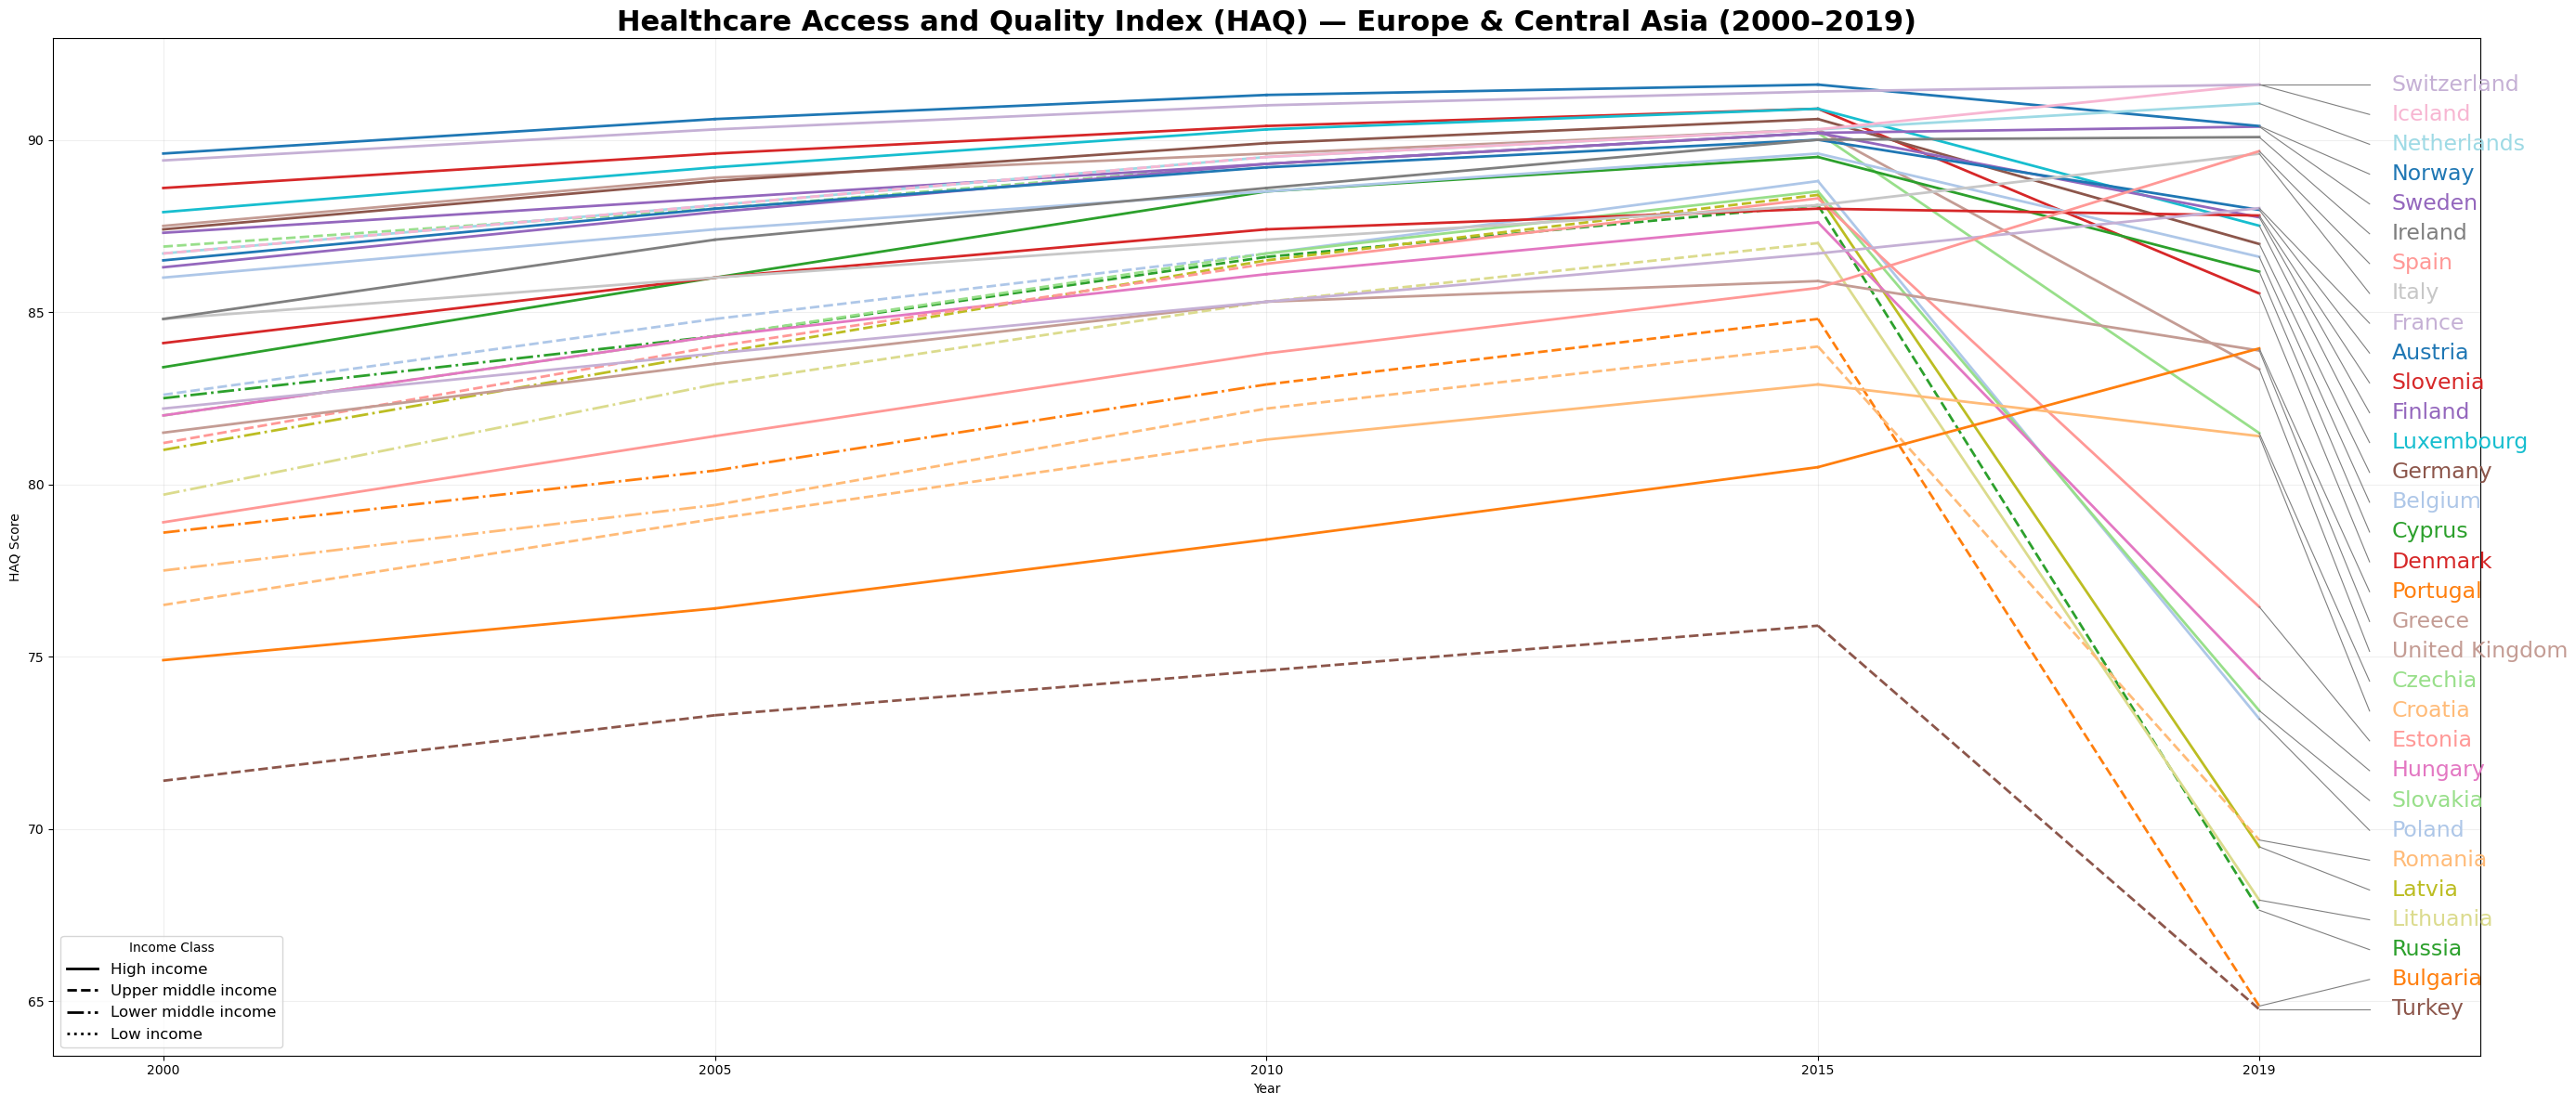

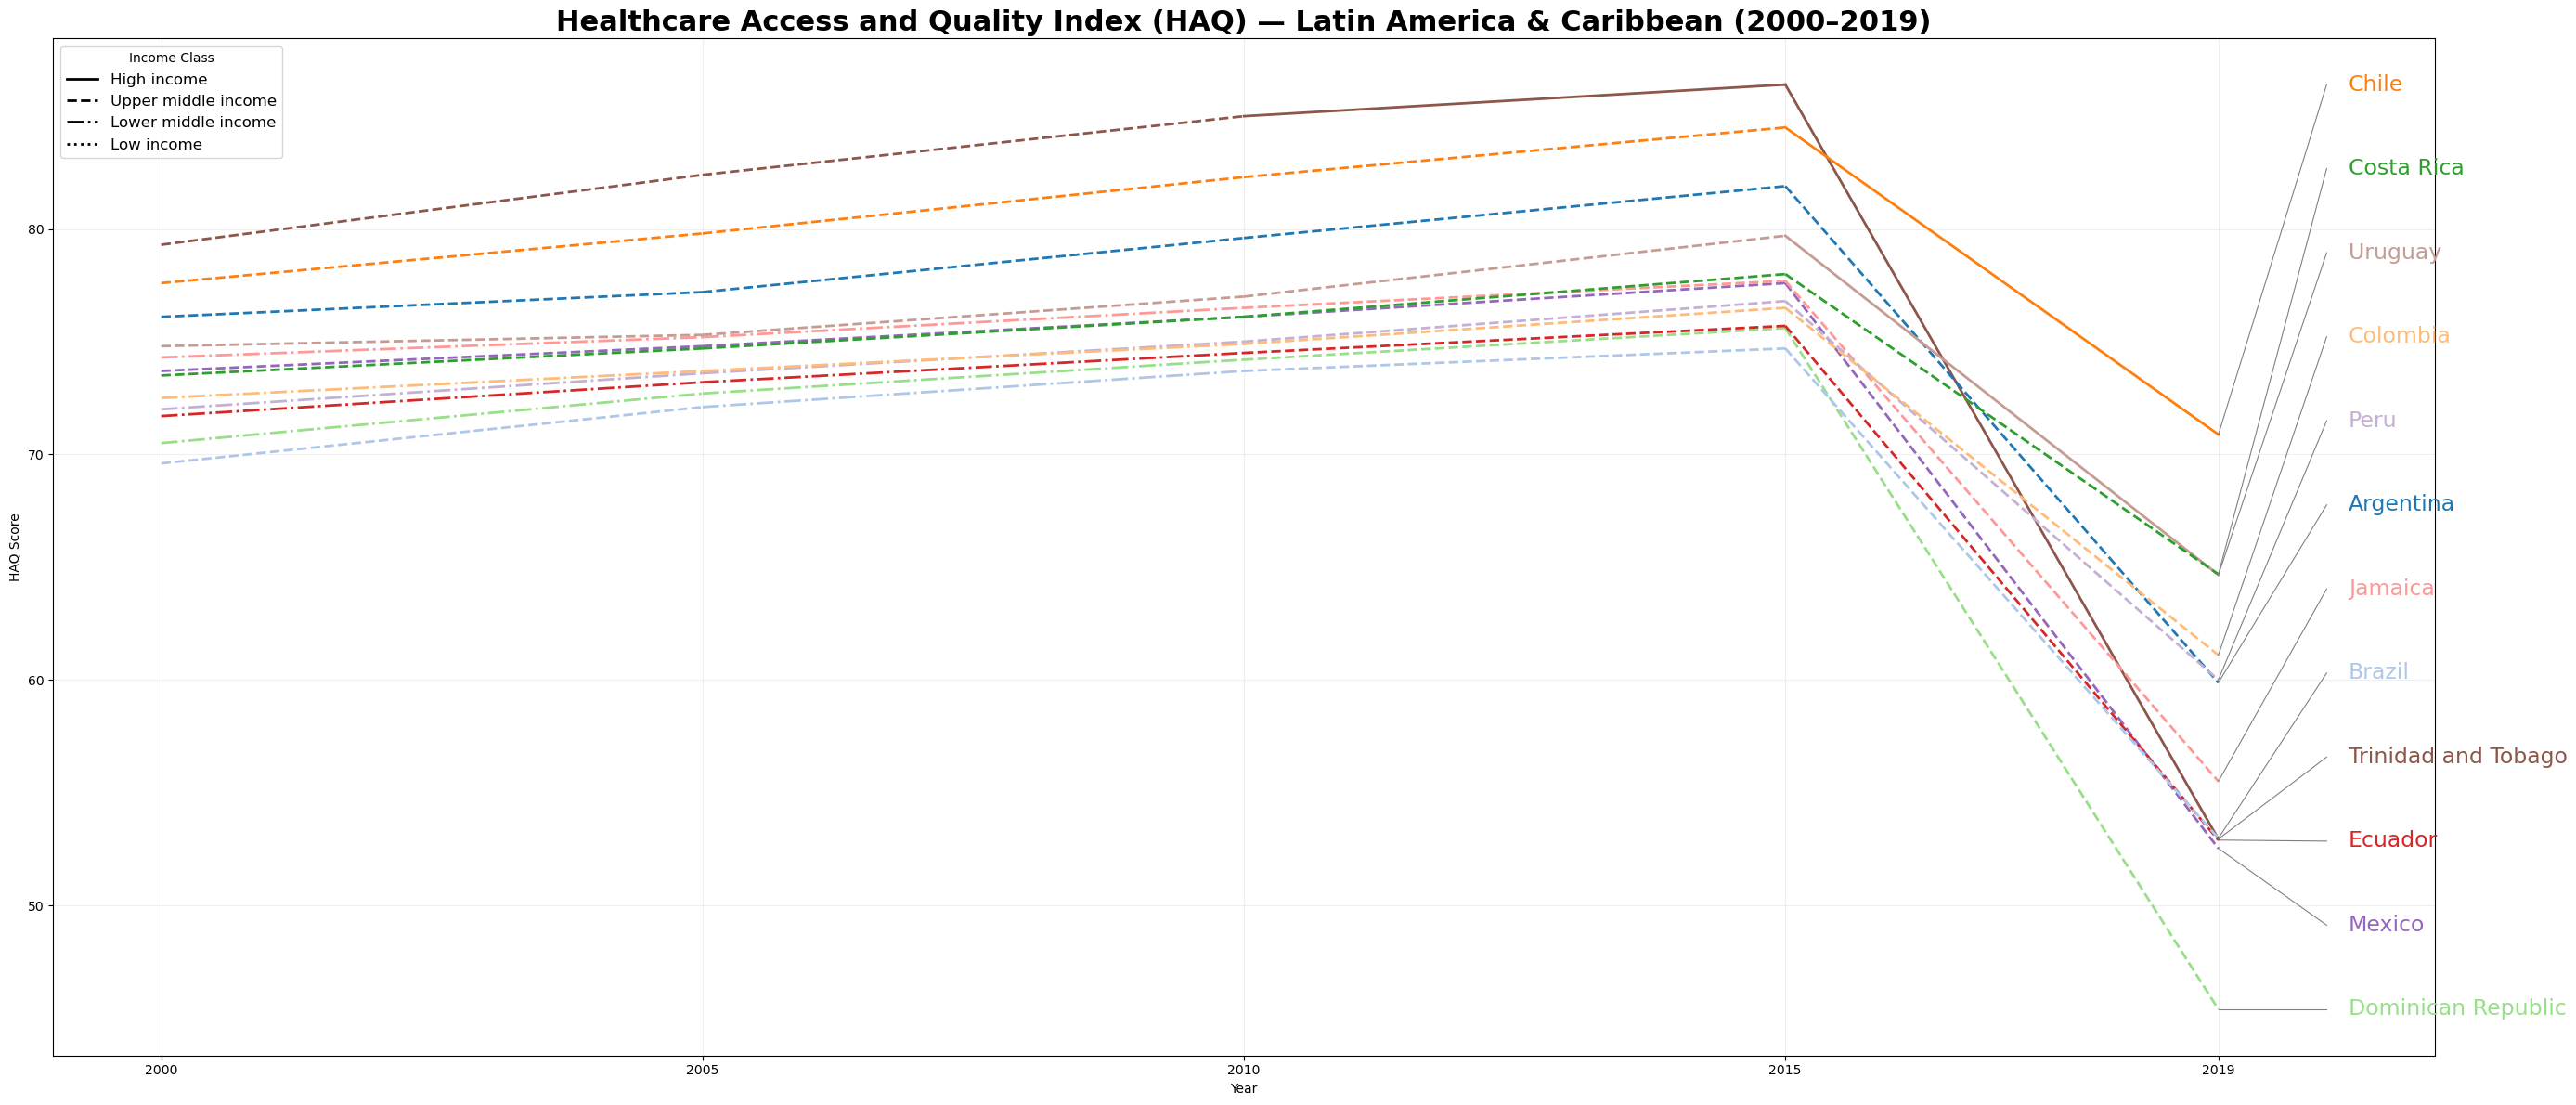

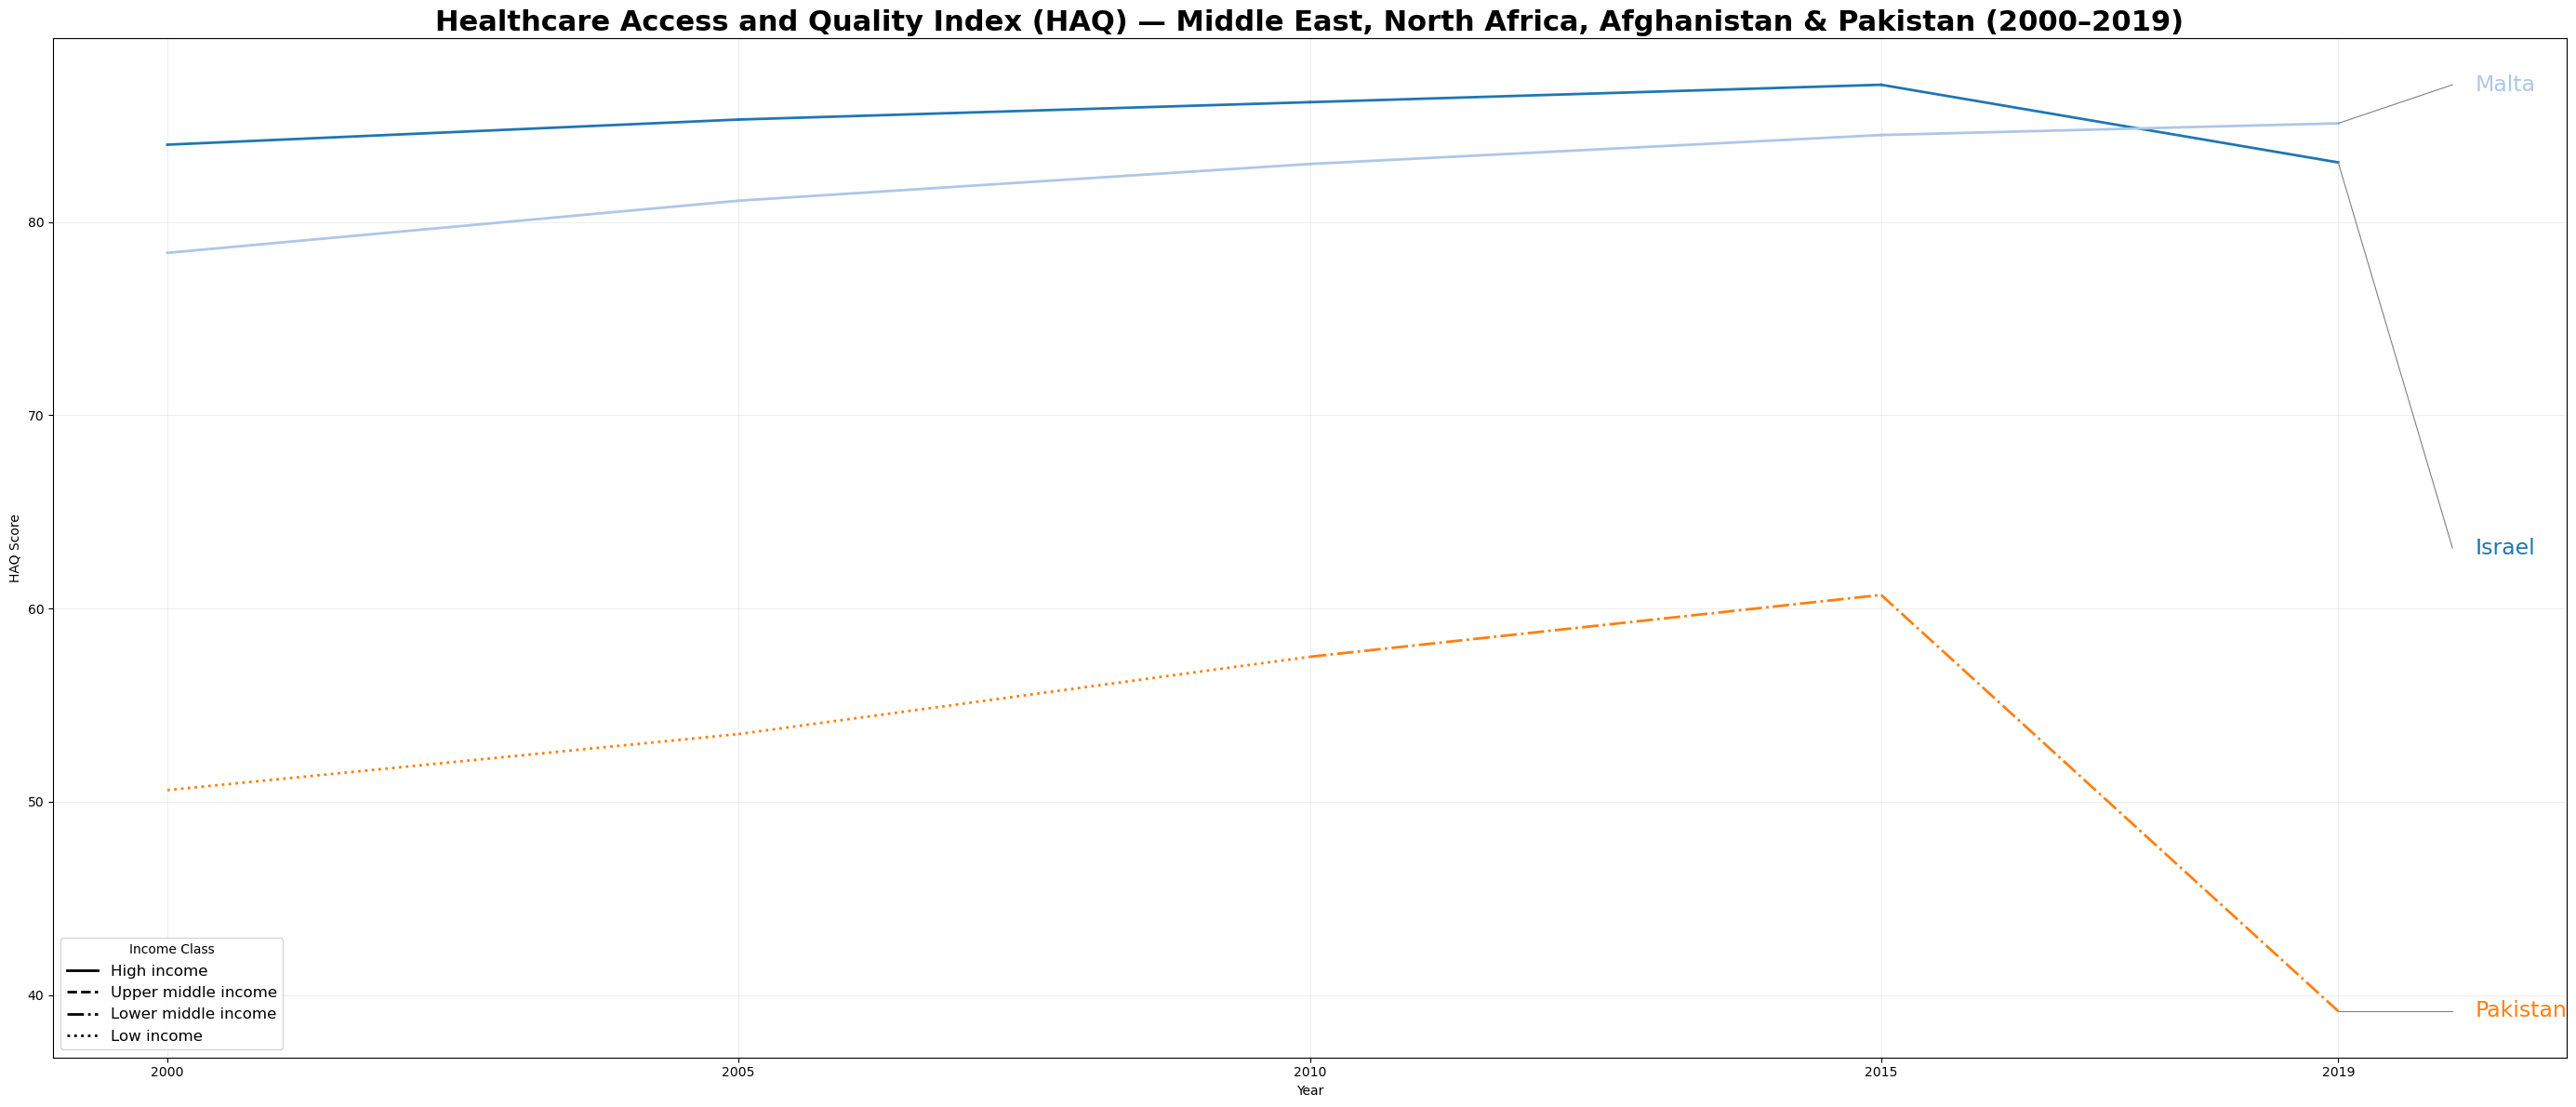

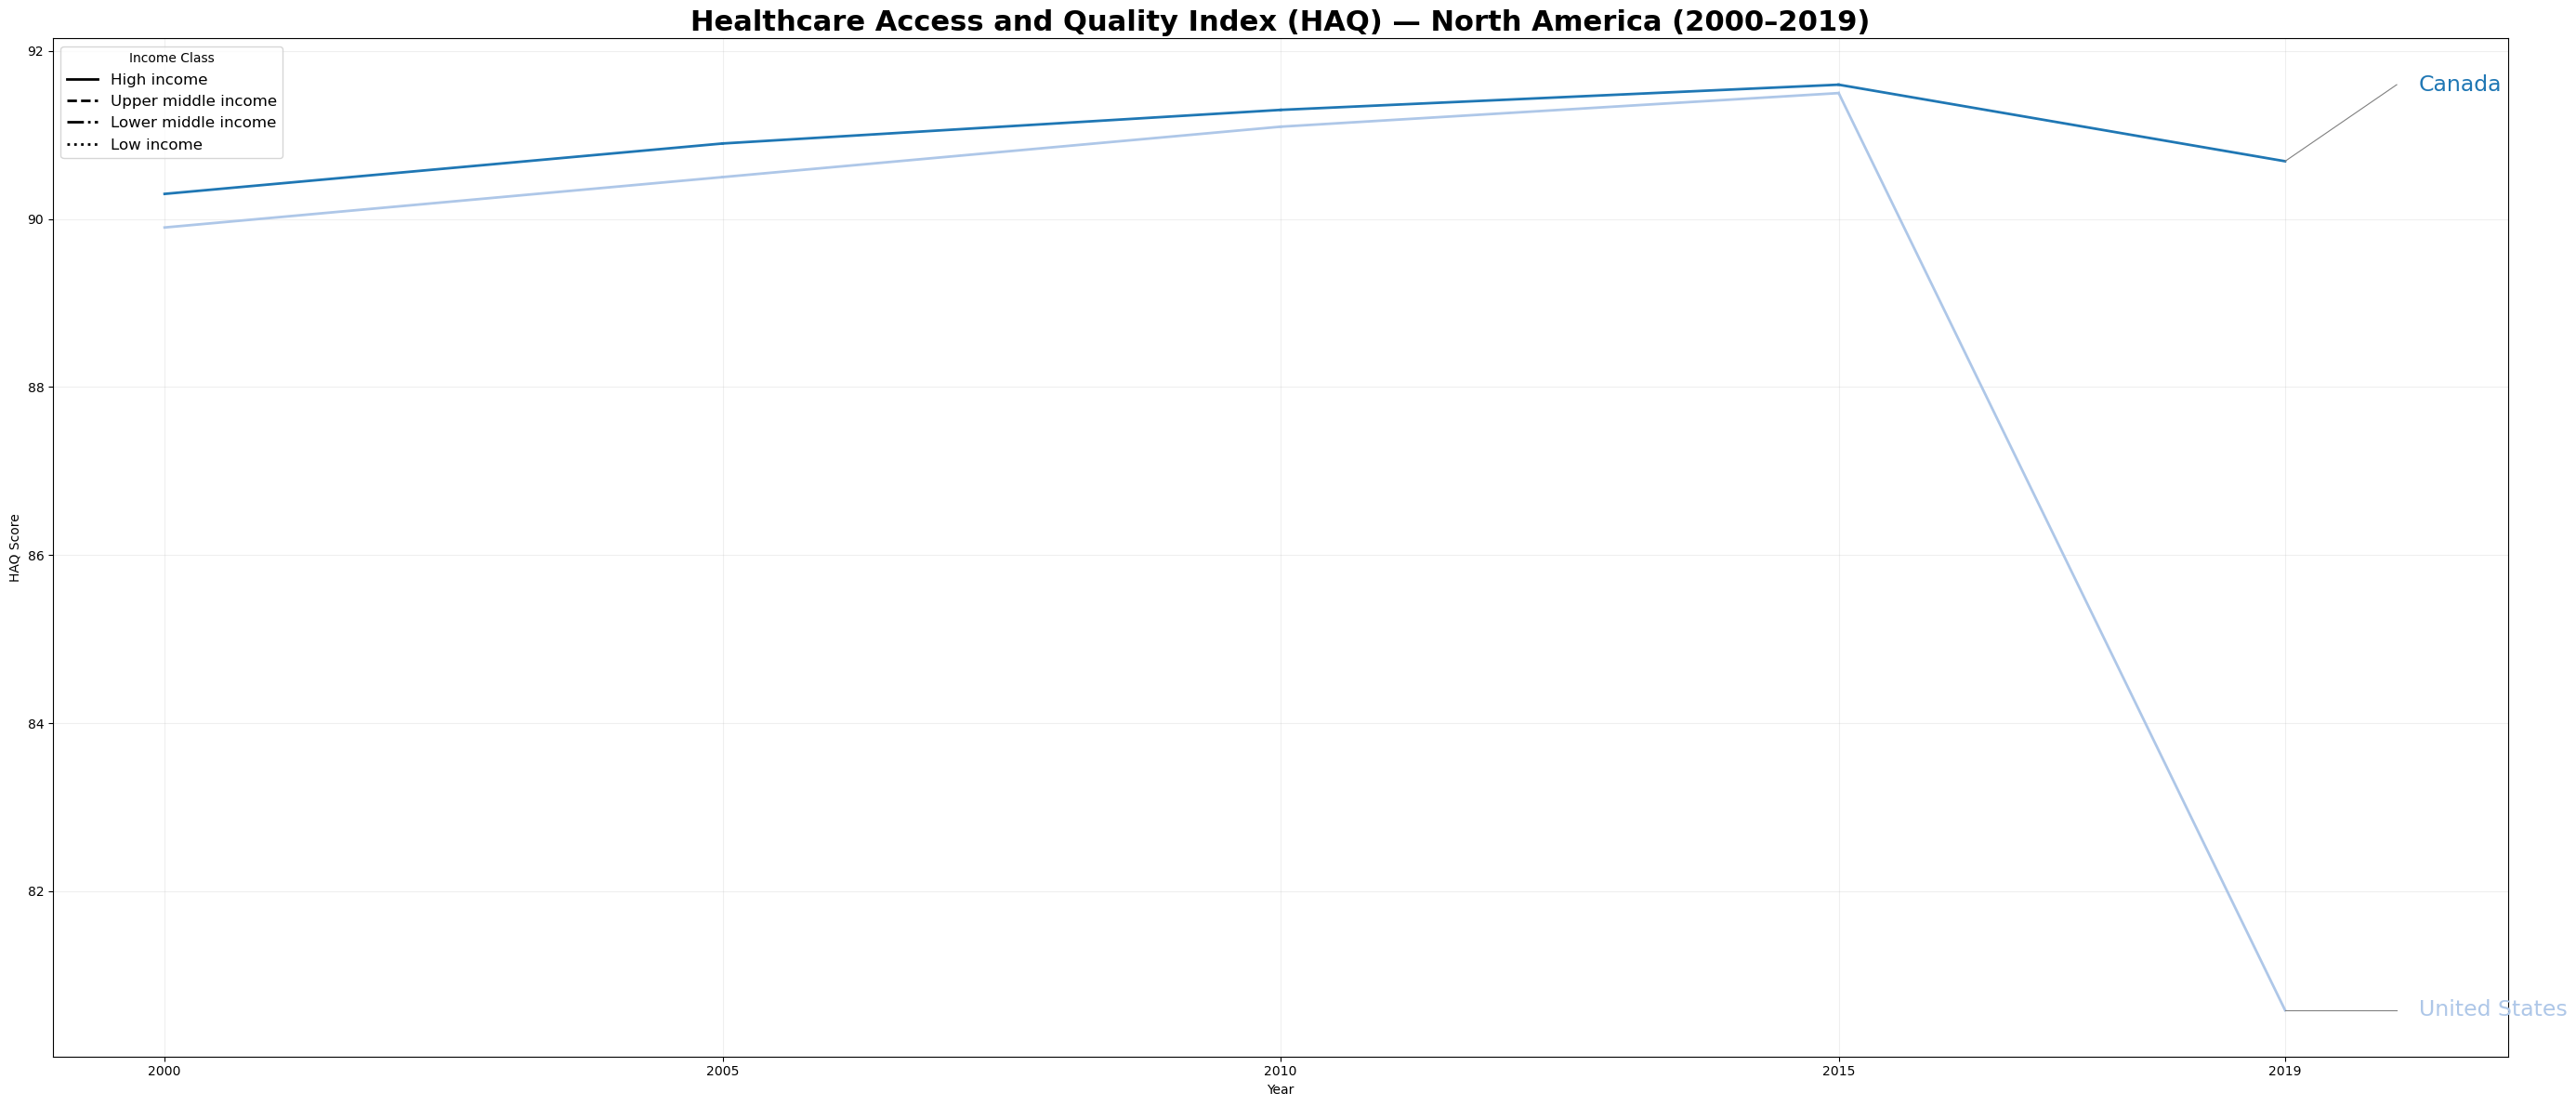

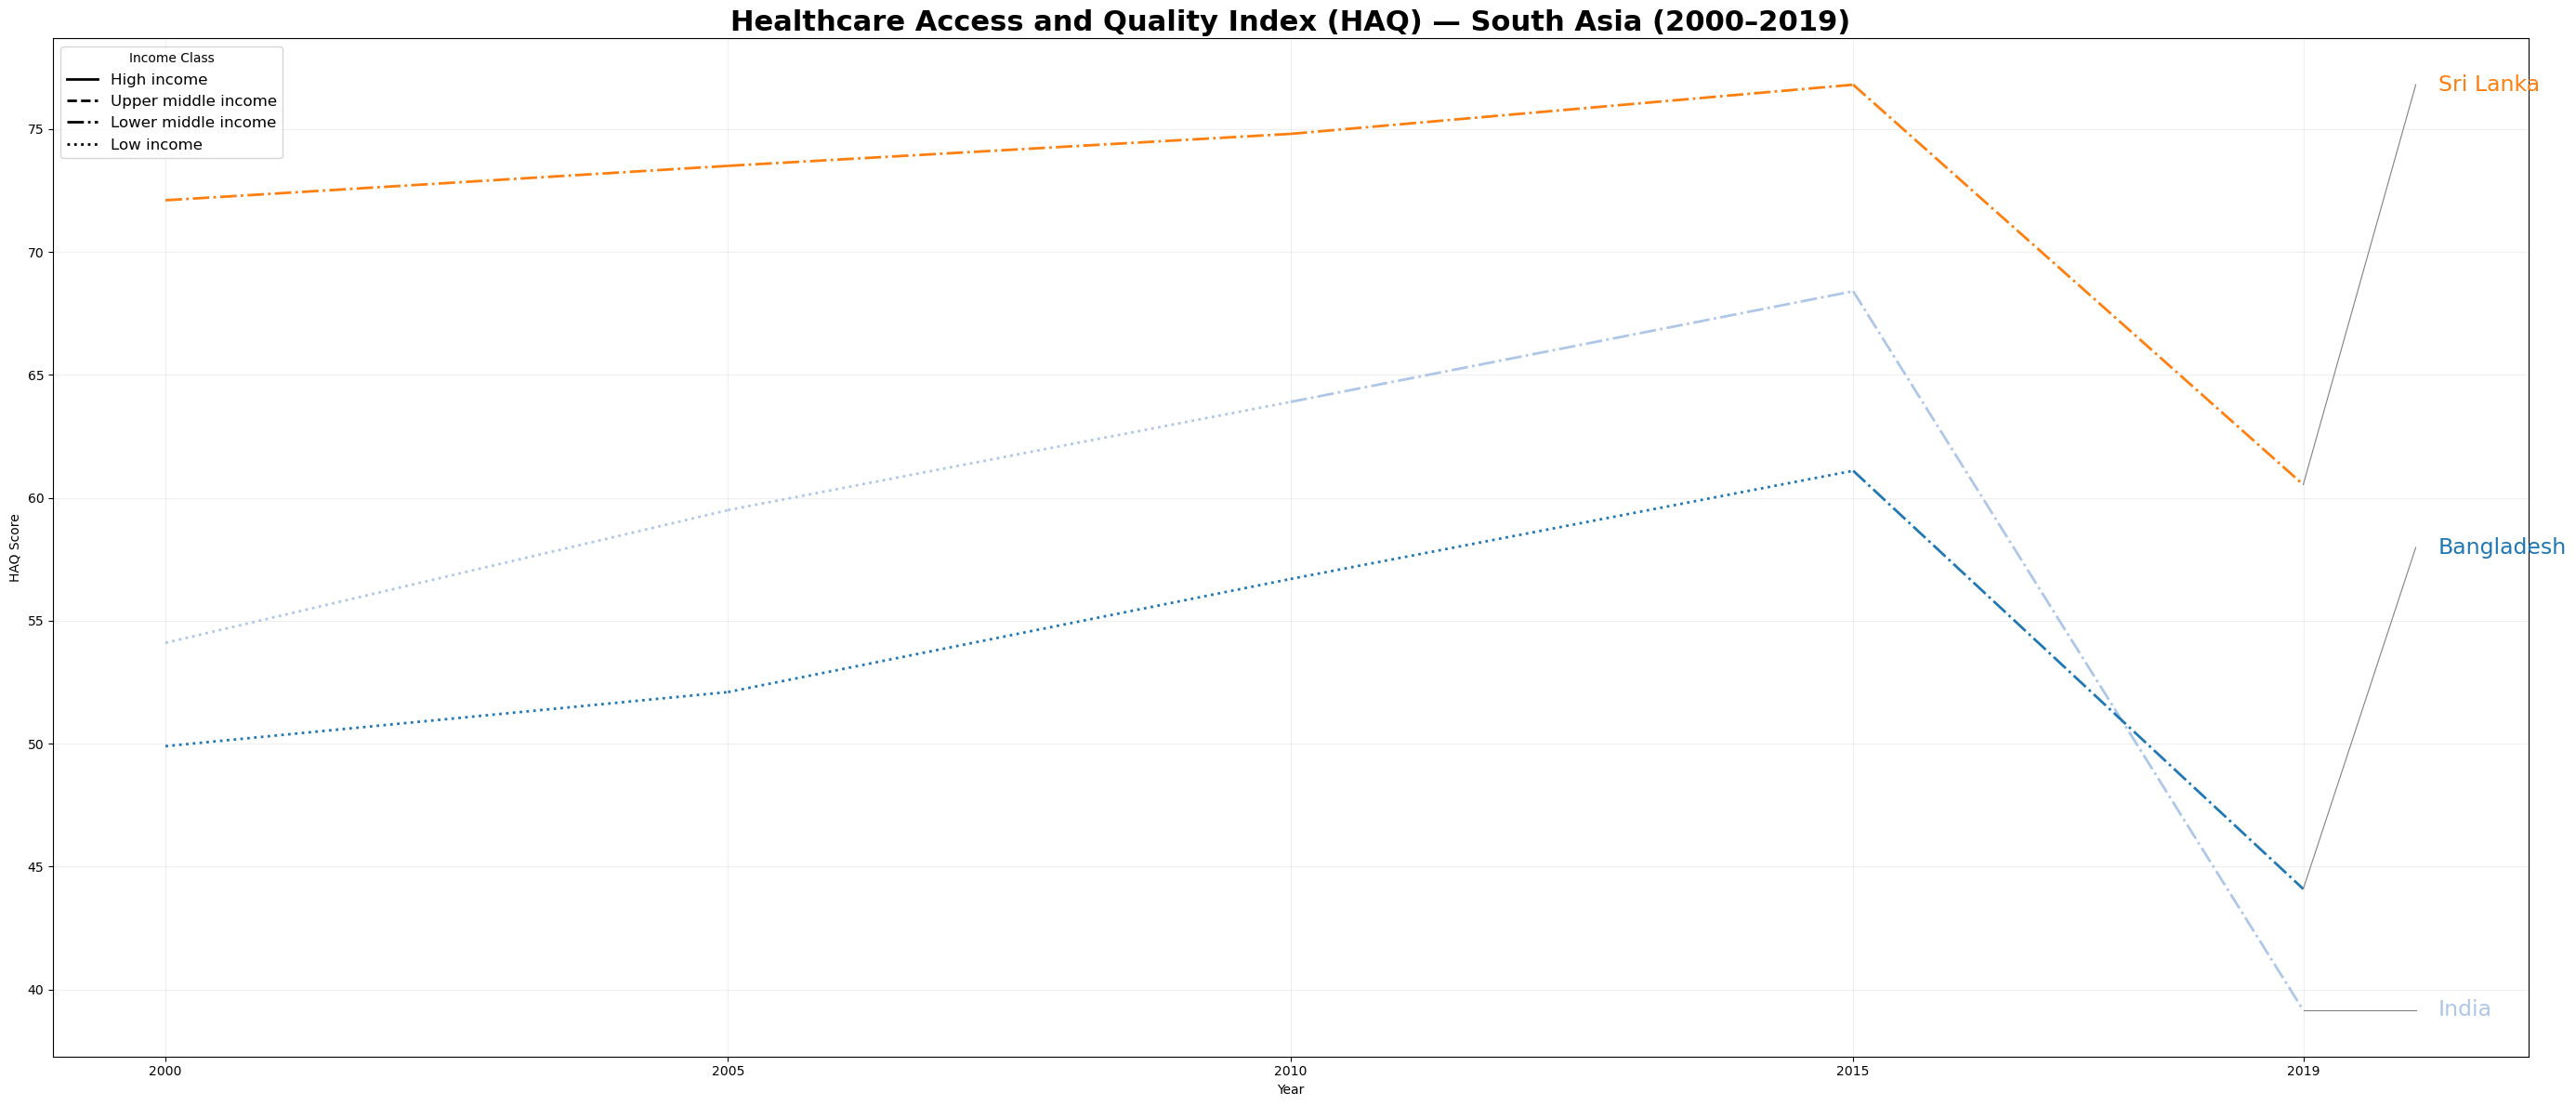

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# income class → line style
style_map = {
    "High income": "solid",
    "Upper middle income": "dashed",
    "Lower middle income": "dashdot",
    "Low income": "dotted"
}

# fixed x-axis ticks
year_ticks = [2000, 2005, 2010, 2015, 2019]

regions = sorted(df[region_col].unique())

for region_name in regions:

    df_r = df[df[region_col] == region_name]
    countries = sorted(df_r[country_col].unique())

    # unique color per country
    color_map = {c: plt.cm.tab20(i % 20) for i, c in enumerate(countries)}

    plt.figure(figsize=(28, 12))

    # get last HAQ to sort labels
    last_vals = []
    for country in countries:
        df_c = df_r[df_r[country_col] == country].sort_values(year_col)
        last_vals.append((country, df_c[haq_col].values[-1]))

    last_vals.sort(key=lambda x: x[1])  # ascending sort

    # even vertical spacing for right labels
    label_positions = np.linspace(
        df_r[haq_col].min(),
        df_r[haq_col].max(),
        len(last_vals)
    )

    # ---- PLOT EVERY COUNTRY ----
    for (country, last_val), label_y in zip(last_vals, label_positions):

        df_c = df_r[df_r[country_col] == country].sort_values(year_col)
        years = df_c[year_col].values
        values = df_c[haq_col].values
        incomes = df_c[income_col].values

        # segment-by-segment line style
        for i in range(len(years) - 1):
            plt.plot(
                [years[i], years[i + 1]],
                [values[i], values[i + 1]],
                color=color_map[country],
                linestyle=style_map.get(incomes[i], "solid"),
                linewidth=2
            )

        # connector line (GRAY ONLY)
        last_x = years[-1]
        last_y = values[-1]
        label_x = years[-1] + 1

        plt.plot(
            [last_x, label_x],
            [last_y, label_y],
            color="gray",
            linewidth=0.8
        )

        # country label
        plt.text(
            label_x + 0.2, label_y, country,
            fontsize=17, va="center",
            color=color_map[country]
        )

    # ---- LEGEND FOR INCOME CLASSES ----
    for name, style in style_map.items():
        plt.plot([], [], linestyle=style, color="black", linewidth=2, label=name)

    plt.legend(title="Income Class", fontsize=12)

    # ---- TITLES ----
    plt.title(
        f"Healthcare Access and Quality Index (HAQ) — {region_name} (2000–2019)",
        fontsize=22, weight="bold"
    )

    # ---- X-AXIS FIX ----
    plt.xticks(year_ticks, year_ticks)

    plt.xlabel("Year")
    plt.ylabel("HAQ Score")
    plt.grid(alpha=0.2)
    plt.tight_layout()

    # SAVE
    safe_region = region_name.replace(" ", "_")
    plt.savefig(f"HAQ_LineRegion_{safe_region}.png", dpi=300, bbox_inches='tight')
    plt.show()


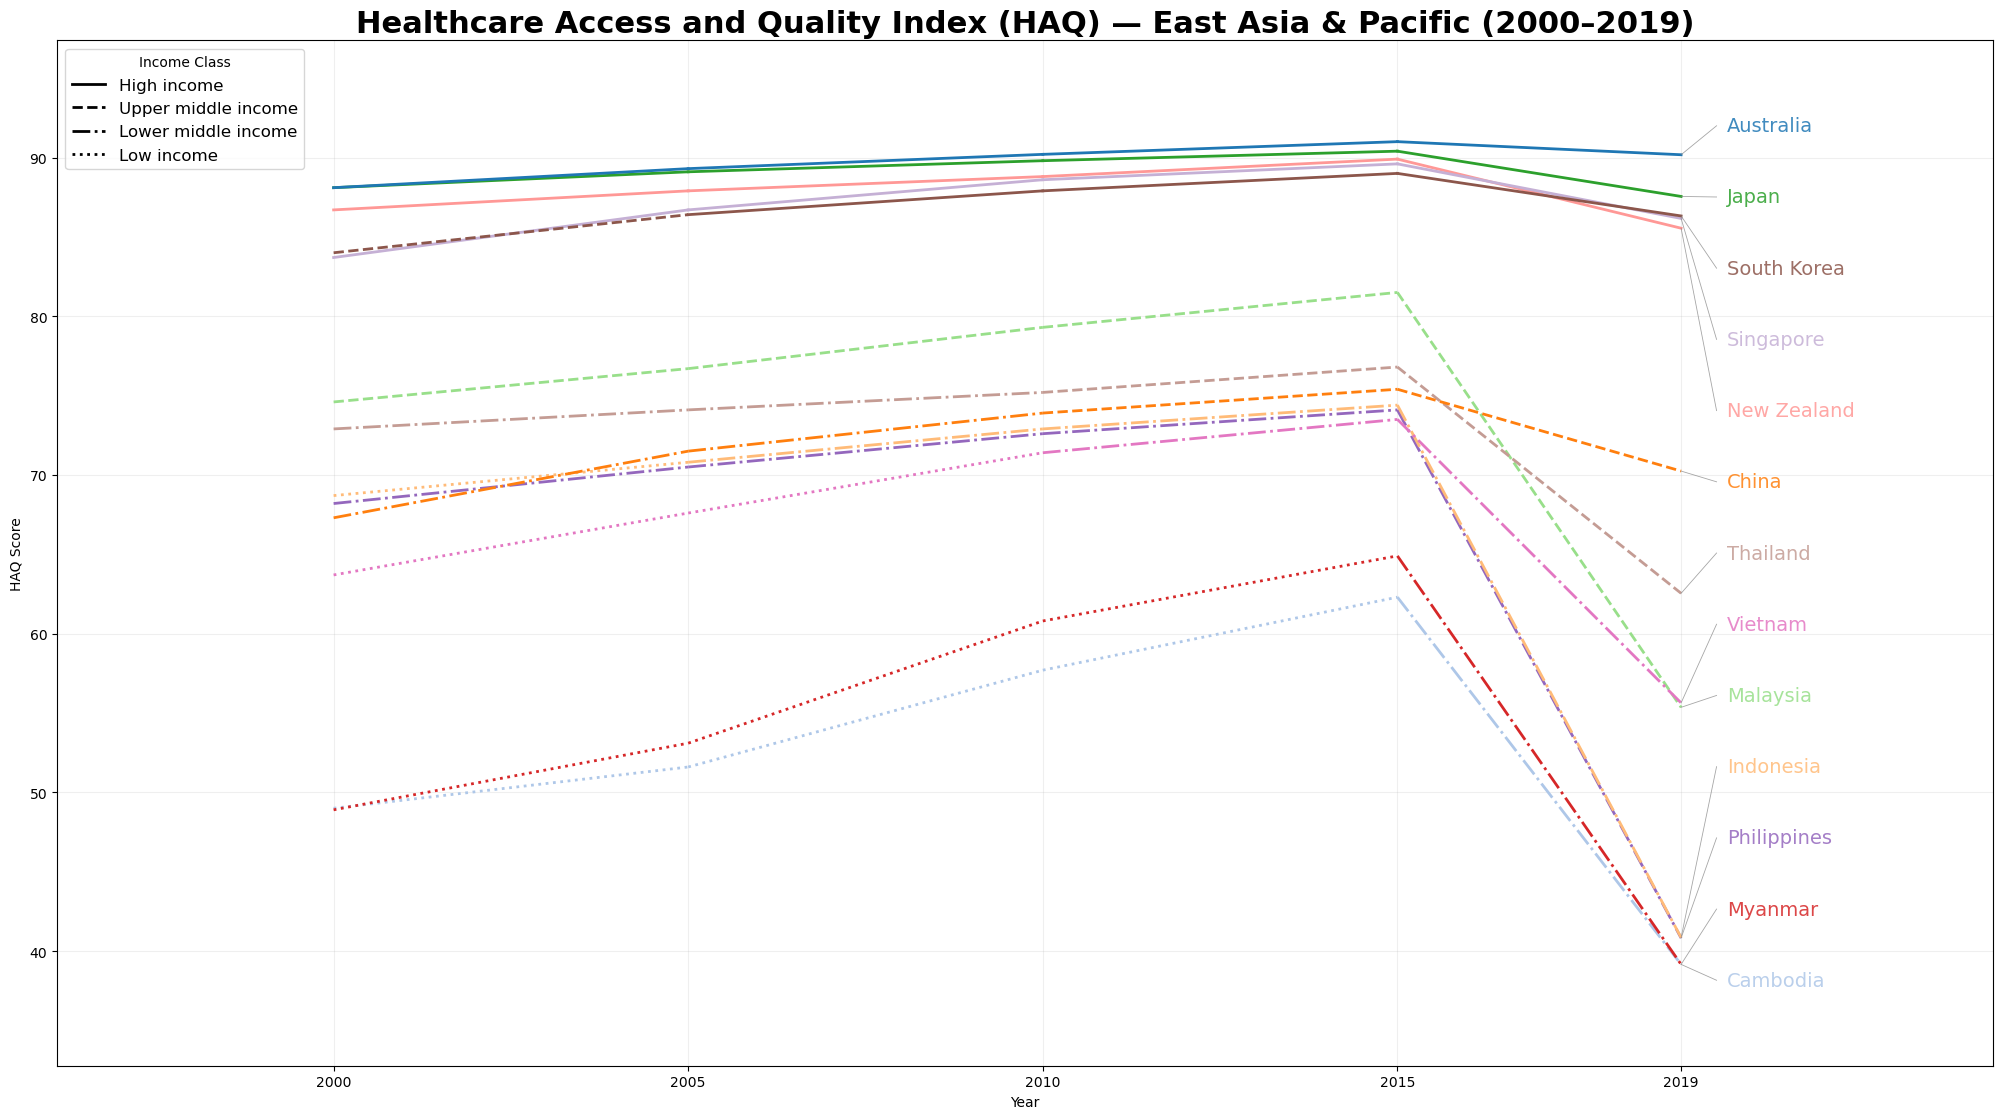

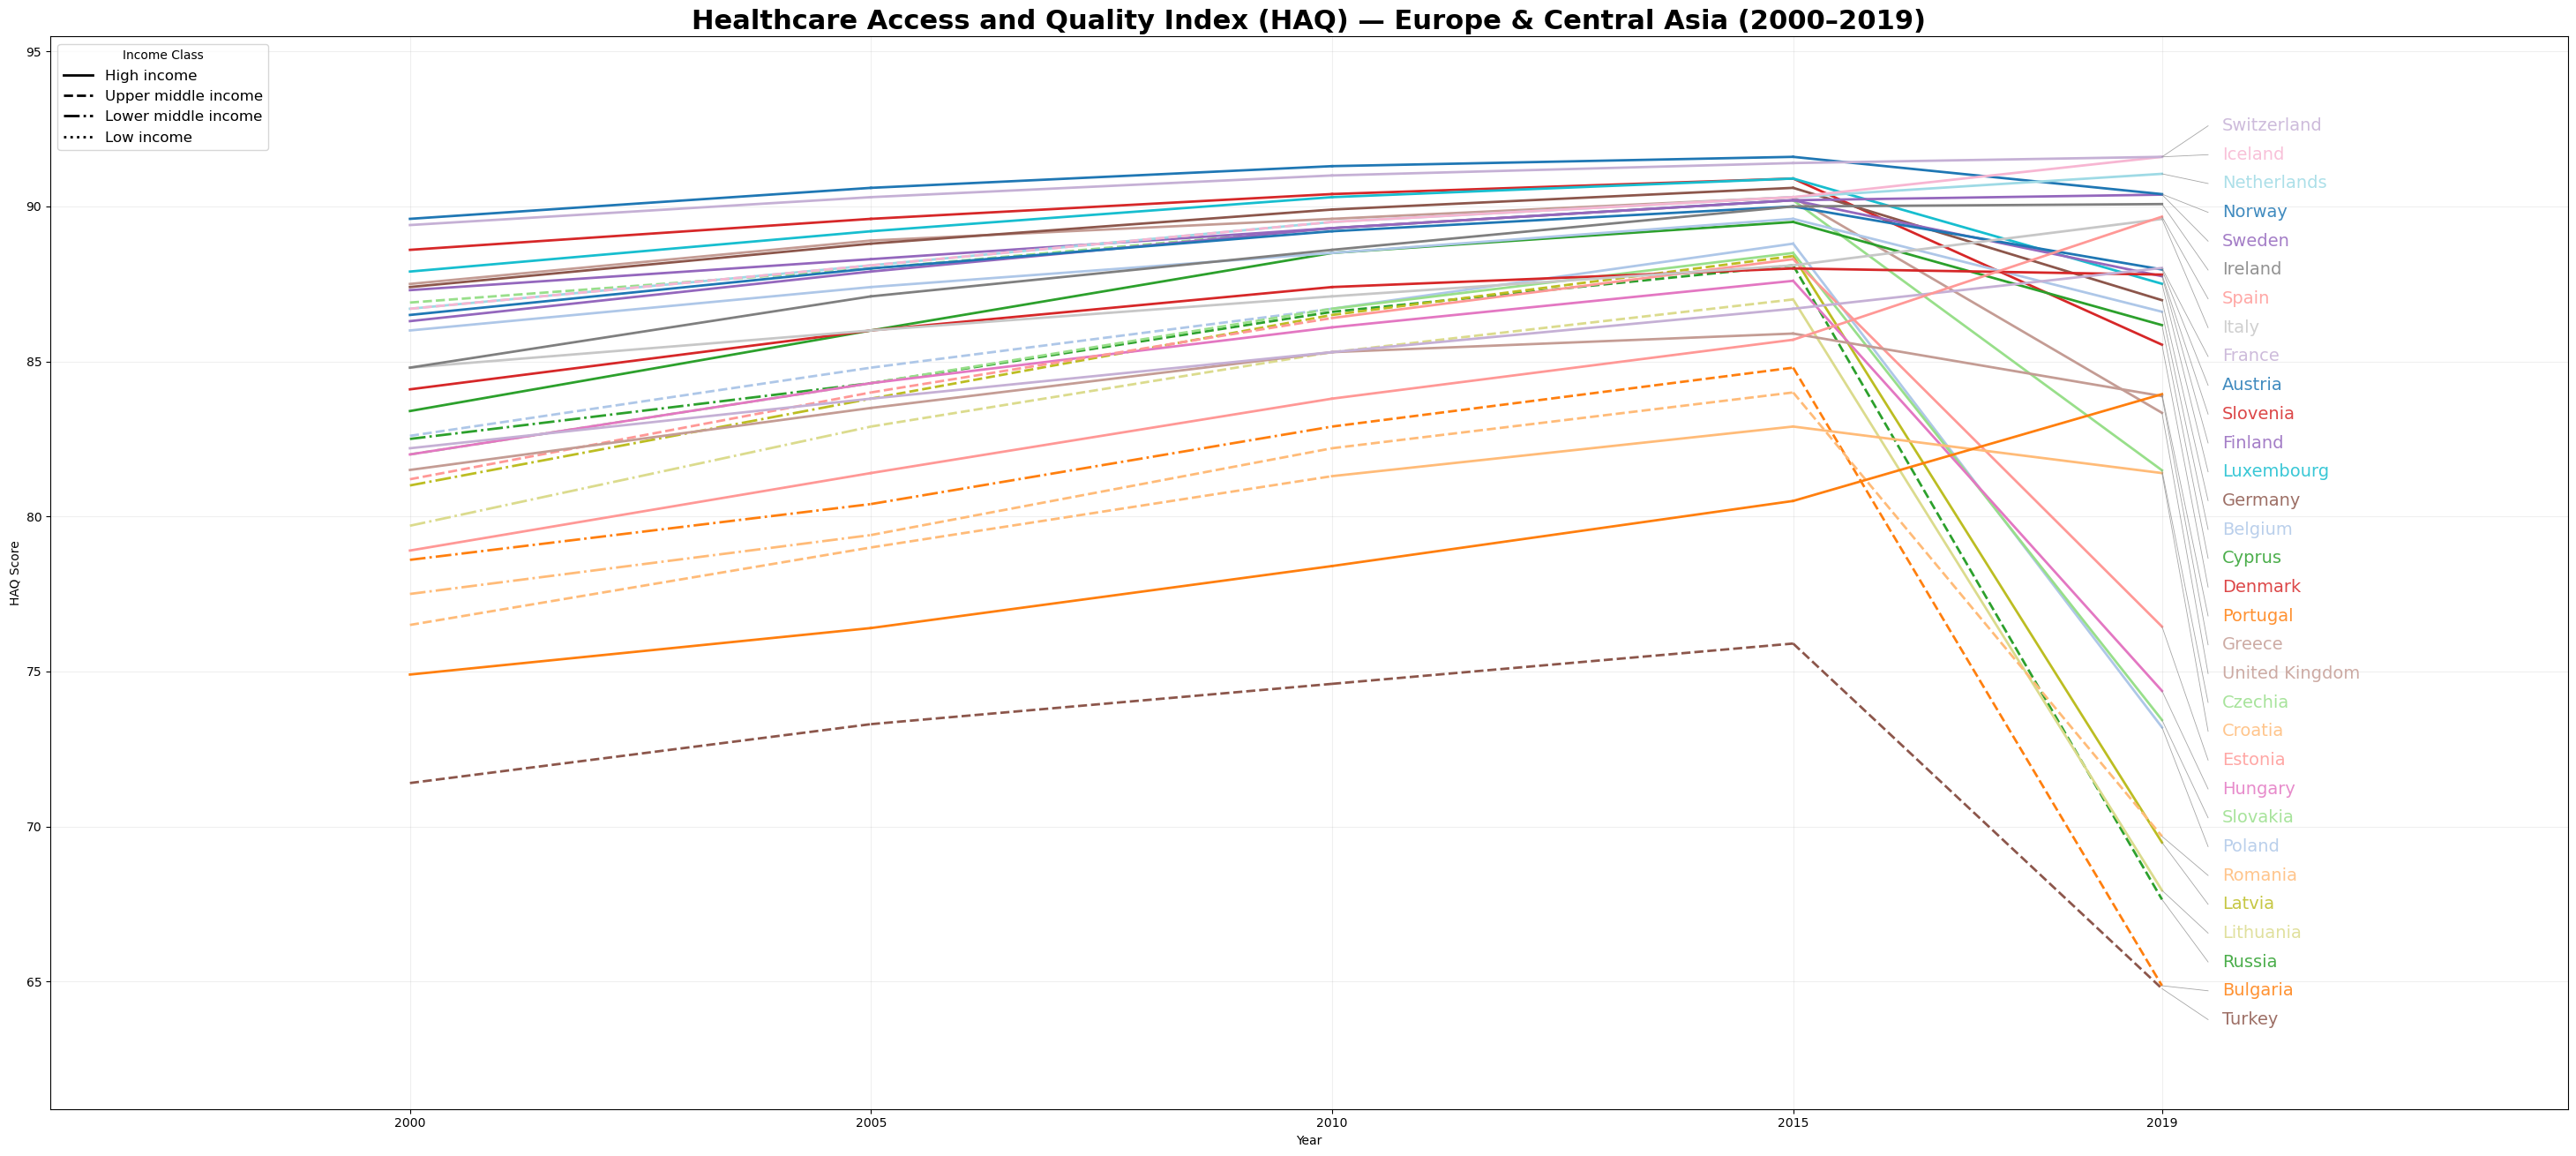

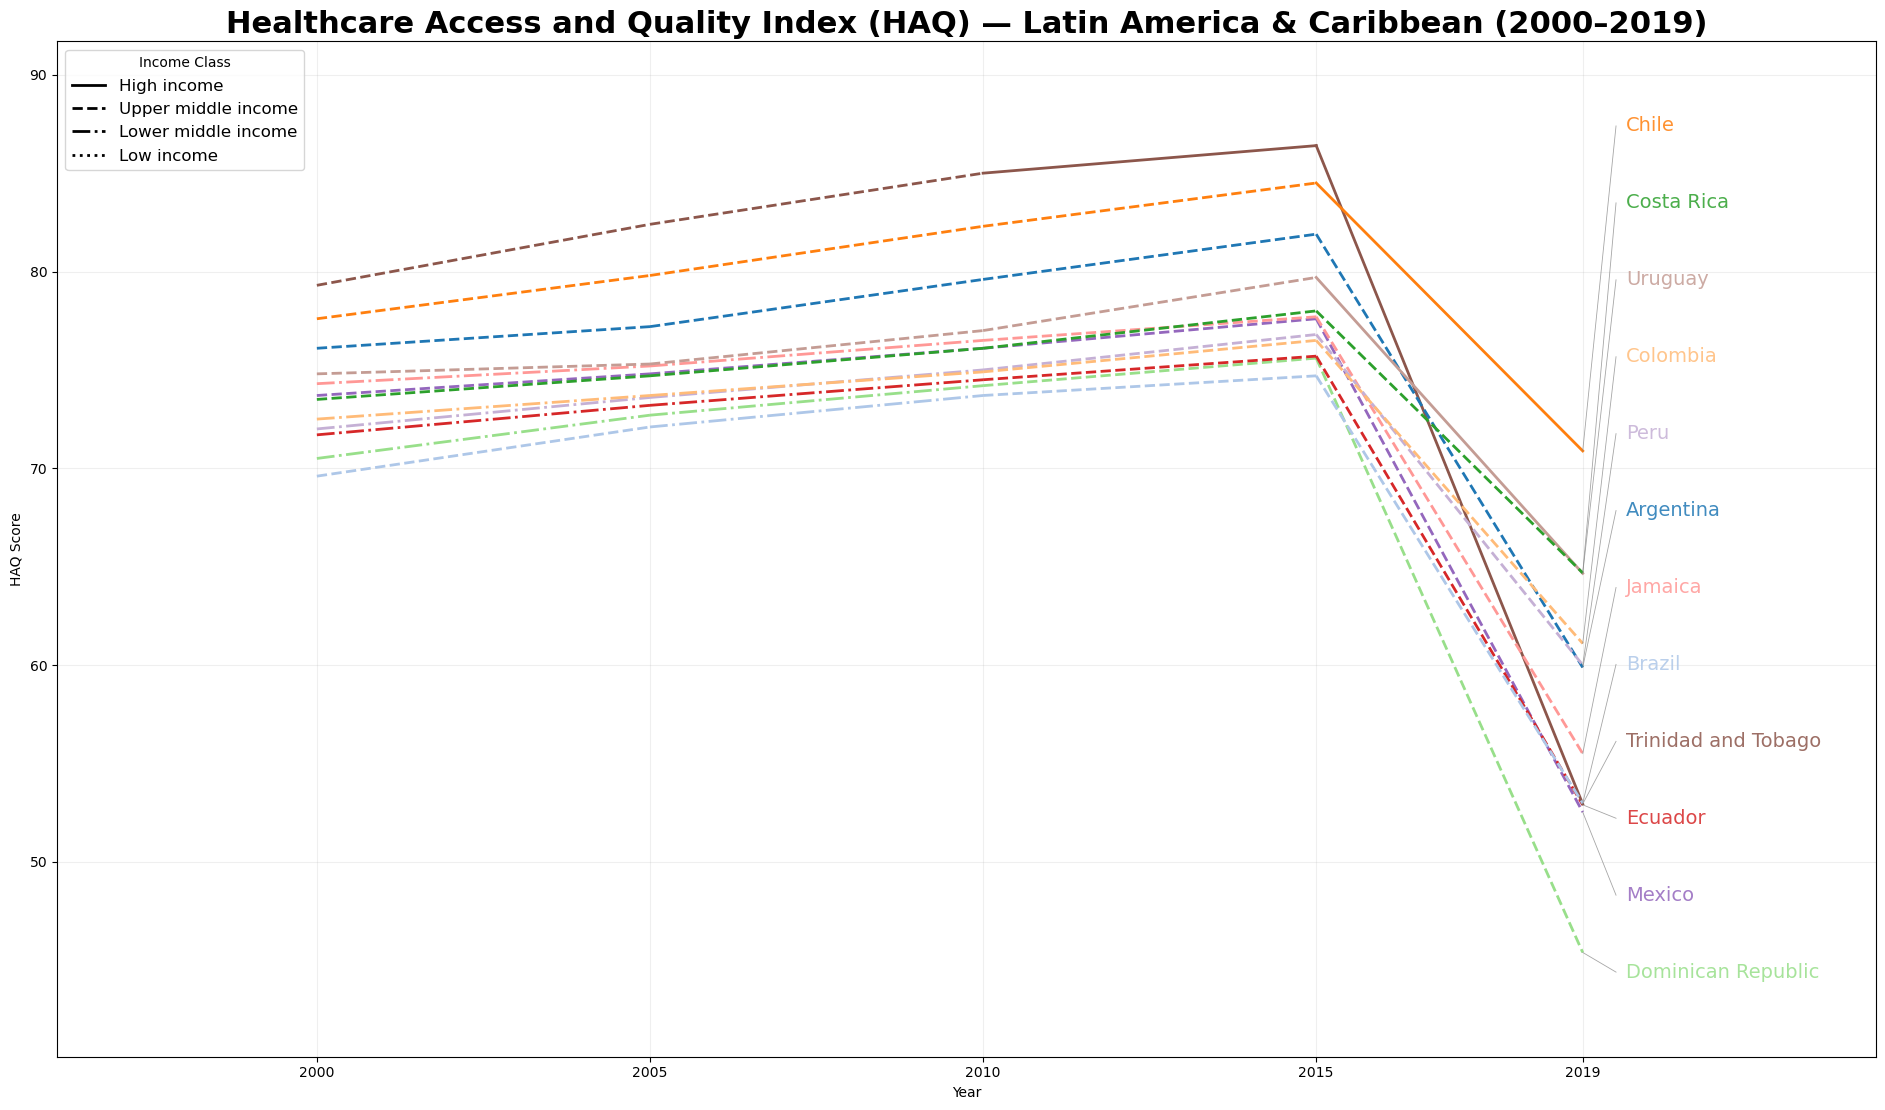

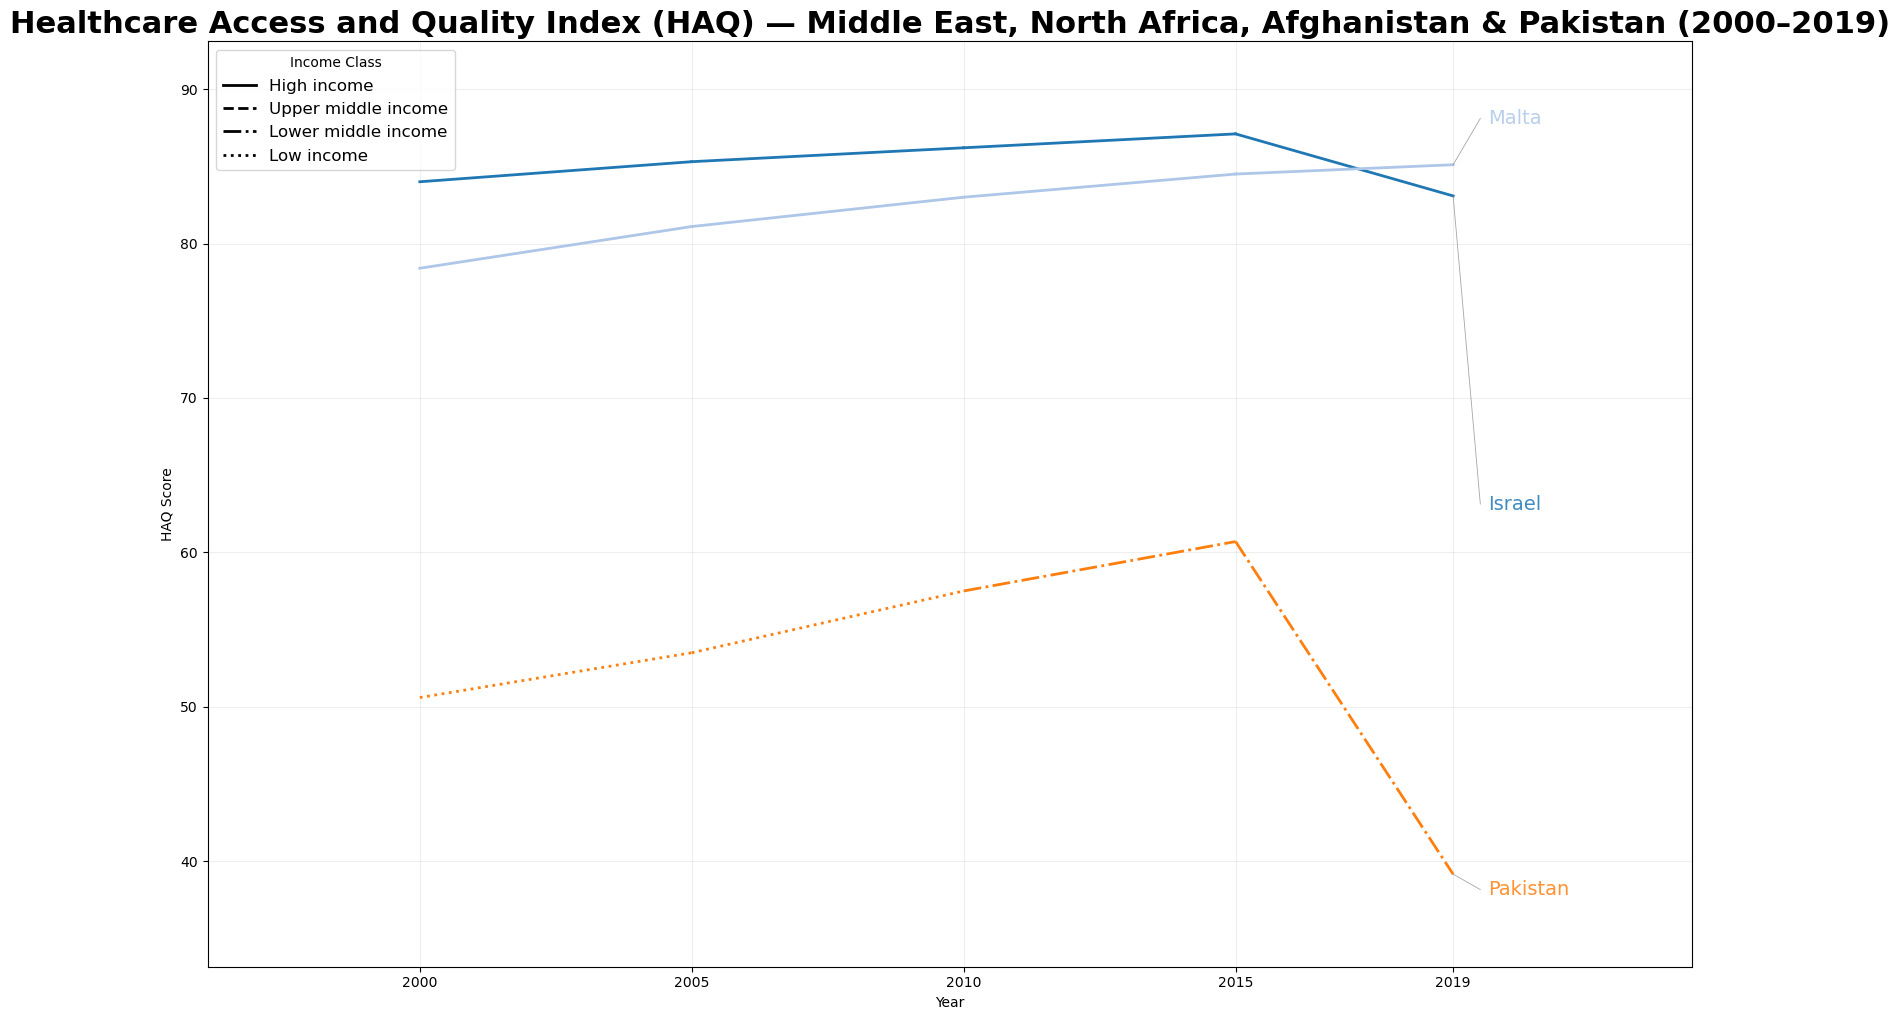

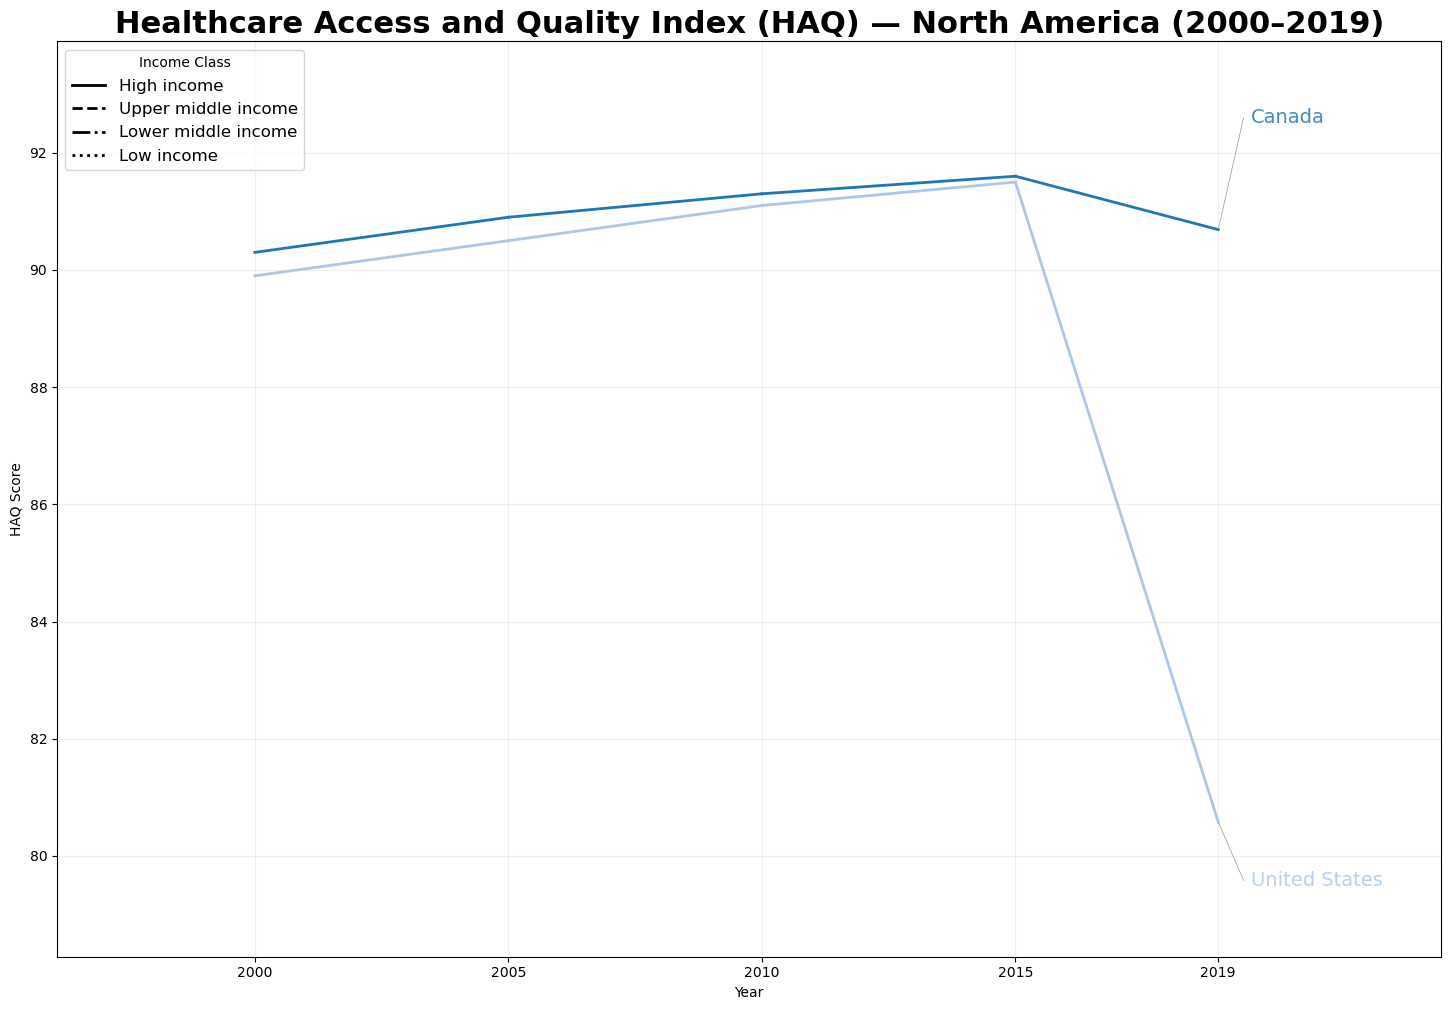

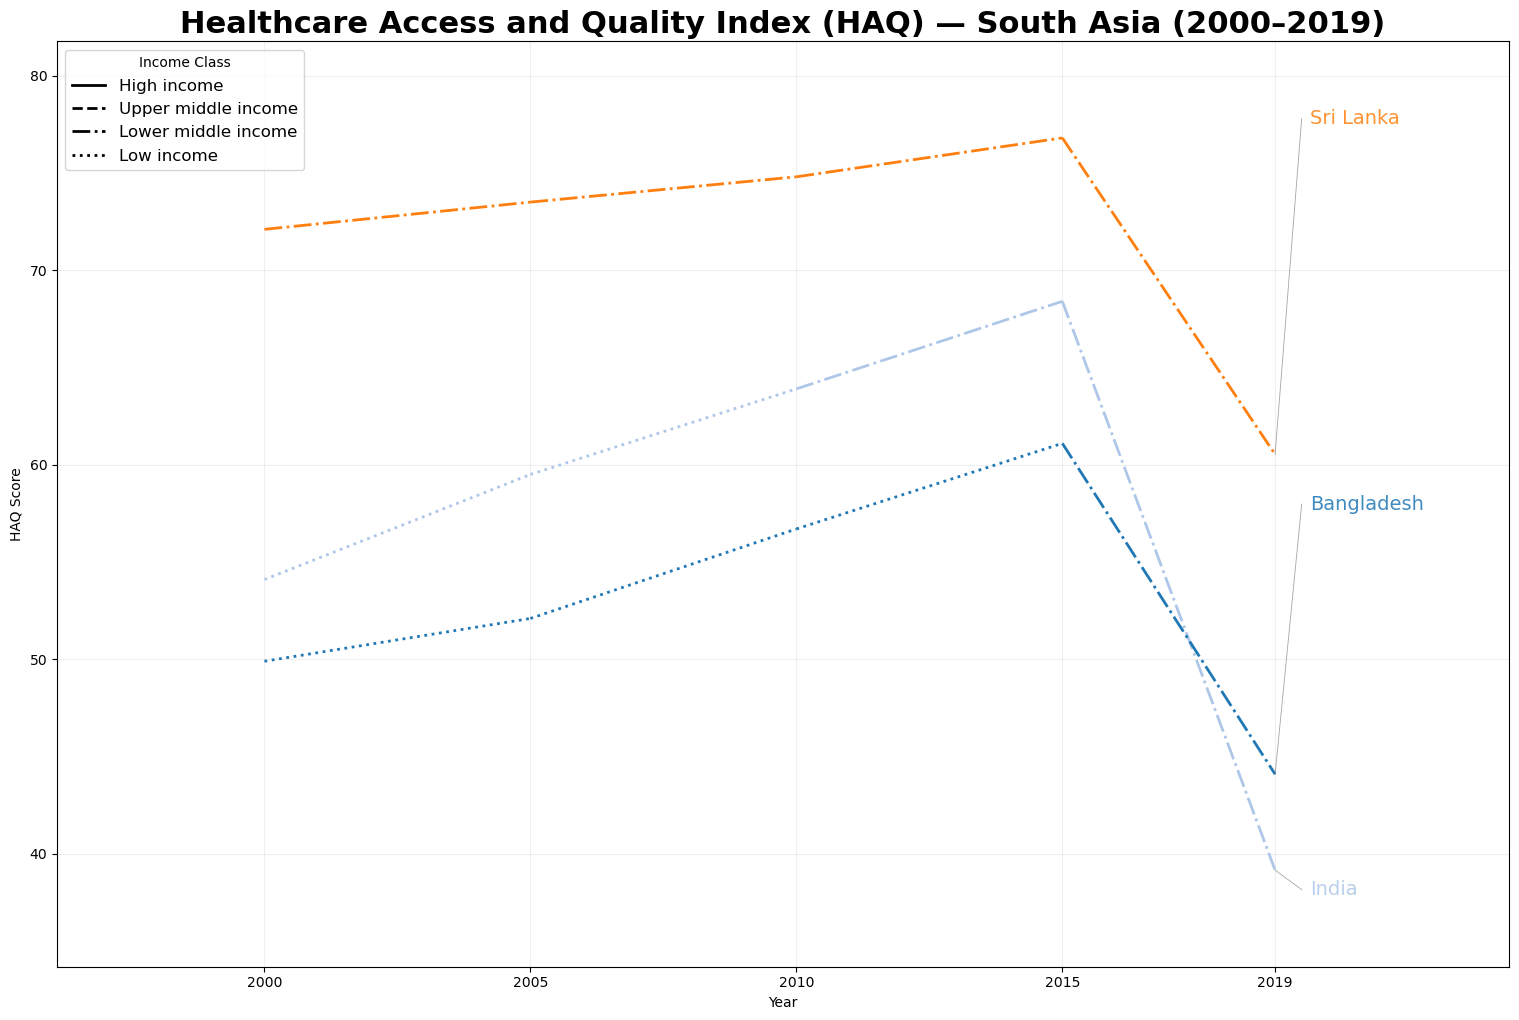

In [8]:
# Automating Frame size for readability. 

# income class → line style
style_map = {
    "High income": "solid",
    "Upper middle income": "dashed",
    "Lower middle income": "dashdot",
    "Low income": "dotted"
}

# fixed x-axis ticks
year_ticks = [2000, 2005, 2010, 2015, 2019]

regions = sorted(df[region_col].unique())

for region_name in regions:

    df_r = df[df[region_col] == region_name]
    countries = sorted(df_r[country_col].unique())
    num_countries = len(countries)

    # unique color per country
    color_map = {c: plt.cm.tab20(i % 20) for i, c in enumerate(countries)}

    # ---------------------------------------------------
    # AUTO-FIT FIGURE SIZE BASED ON NUMBER OF COUNTRIES
    # ---------------------------------------------------
    fig_width = 18 + (num_countries * 0.6)
    fig_height = 10 + (num_countries * 0.1)

    plt.figure(figsize=(fig_width, fig_height))

    # get last HAQ to sort labels
    last_vals = []
    for country in countries:
        df_c = df_r[df_r[country_col] == country].sort_values(year_col)
        last_vals.append((country, df_c[haq_col].values[-1]))

    last_vals.sort(key=lambda x: x[1])  # ascending sort

    # even vertical spacing for right labels (cleaner spacing)
    label_positions = np.linspace(
        df_r[haq_col].min() - 1,
        df_r[haq_col].max() + 1,
        len(last_vals)
    )

    # ---- PLOT EVERY COUNTRY ----
    for (country, last_val), label_y in zip(last_vals, label_positions):

        df_c = df_r[df_r[country_col] == country].sort_values(year_col)
        years = df_c[year_col].values
        values = df_c[haq_col].values
        incomes = df_c[income_col].values

        # segment-by-segment line style
        for i in range(len(years) - 1):
            plt.plot(
                [years[i], years[i + 1]],
                [values[i], values[i + 1]],
                color=color_map[country],
                linestyle=style_map.get(incomes[i], "solid"),
                linewidth=2
            )

        # ---------- CLEAN POINTER VERSION ----------
        last_x = years[-1]
        last_y = values[-1]

        # shorter pointer for cleanliness
        label_x = years[-1] + 0.5

        # clean, subtle connector line
        plt.plot(
            [last_x, label_x],
            [last_y, label_y],
            color="gray",
            linewidth=0.6,
            alpha=0.7
        )

        # clean label
        plt.text(
            label_x + 0.15, label_y, country,
            fontsize=14, va="center",
            color=color_map[country],
            alpha=0.85
        )
        # -------------------------------------------

    # ---- LEGEND FOR INCOME CLASSES ----
    for name, style in style_map.items():
        plt.plot([], [], linestyle=style, color="black", linewidth=2, label=name)

    plt.legend(title="Income Class", fontsize=12, loc="upper left")

    # ---- TITLES ----
    plt.title(
        f"Healthcare Access and Quality Index (HAQ) — {region_name} (2000–2019)",
        fontsize=22, weight="bold"
    )

    # ---- X-AXIS FIX ----
    plt.xticks(year_ticks, year_ticks)

    plt.xlabel("Year")
    plt.ylabel("HAQ Score")
    plt.grid(alpha=0.2)

    # ---------------------------------------------------
    # AUTO SPACE SO LABELS DON'T GET CUT OFF
    # ---------------------------------------------------
    plt.tight_layout(rect=[0, 0, 0.80, 1])  # more space on right
    plt.margins(x=0.2, y=0.1)

    # SAVE
    safe_region = region_name.replace(" ", "_")
    plt.savefig(f"HAQ_LineRegion_{safe_region}.png", dpi=300, bbox_inches='tight')
    plt.show()


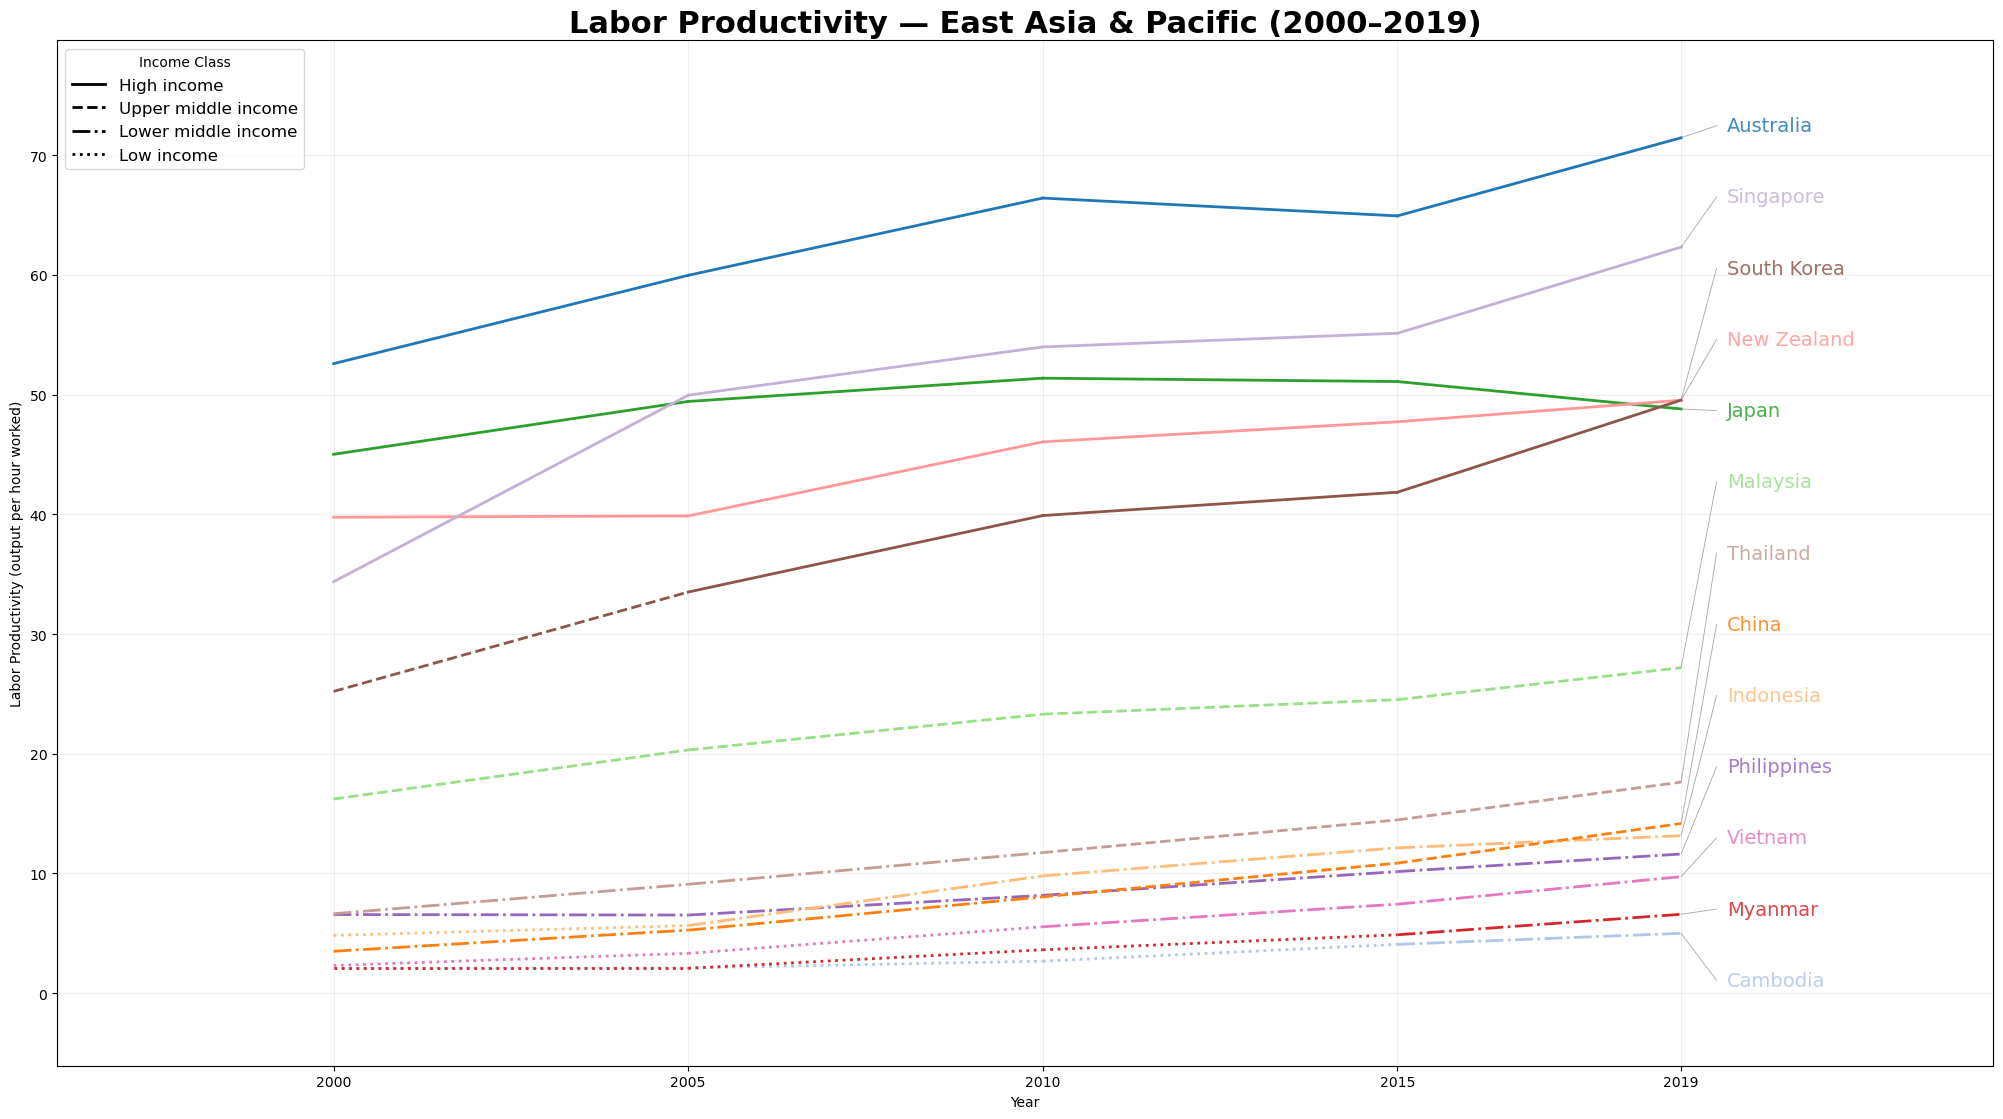

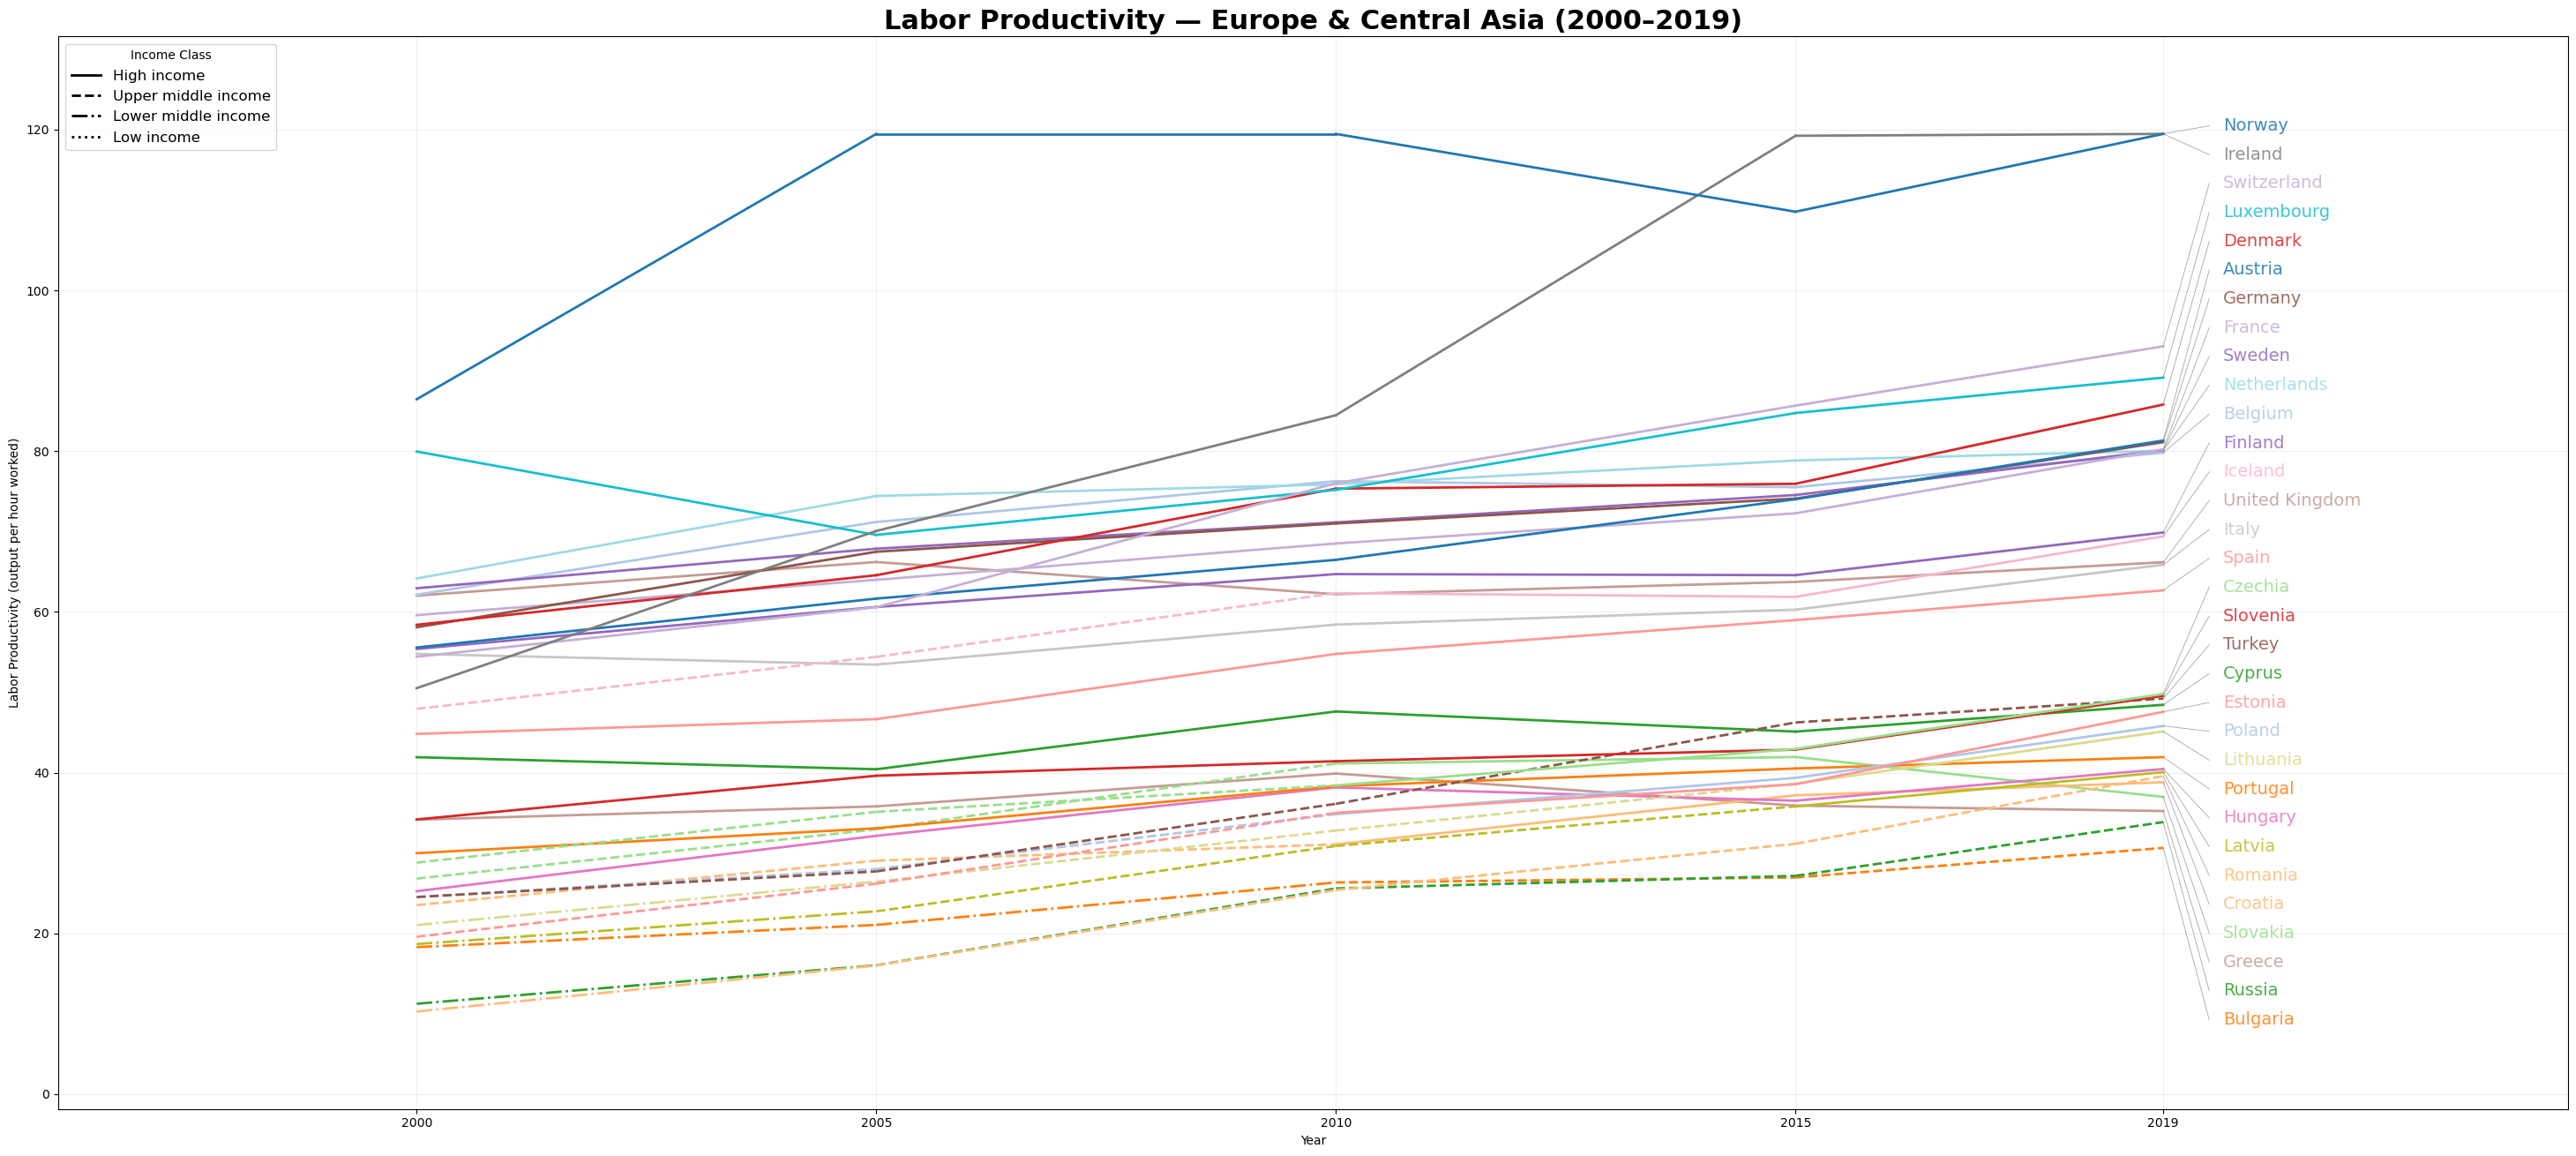

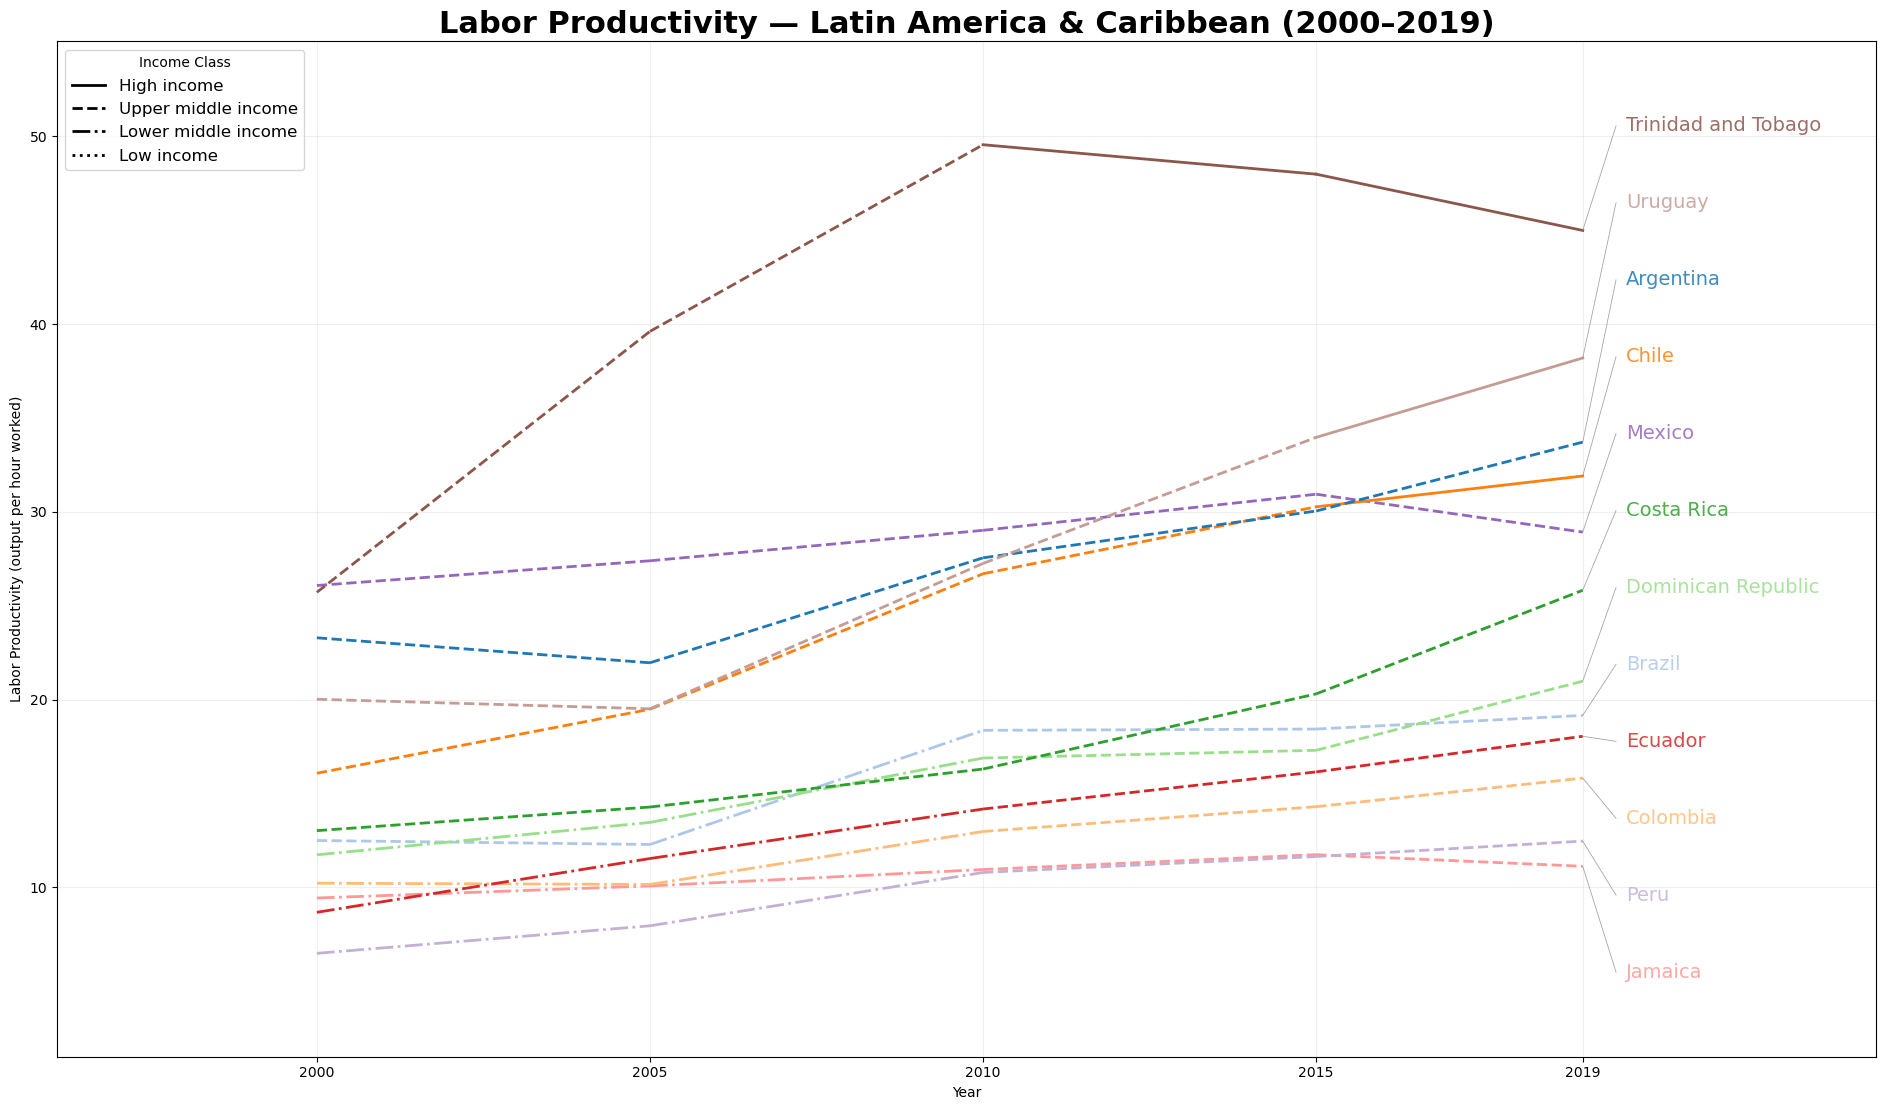

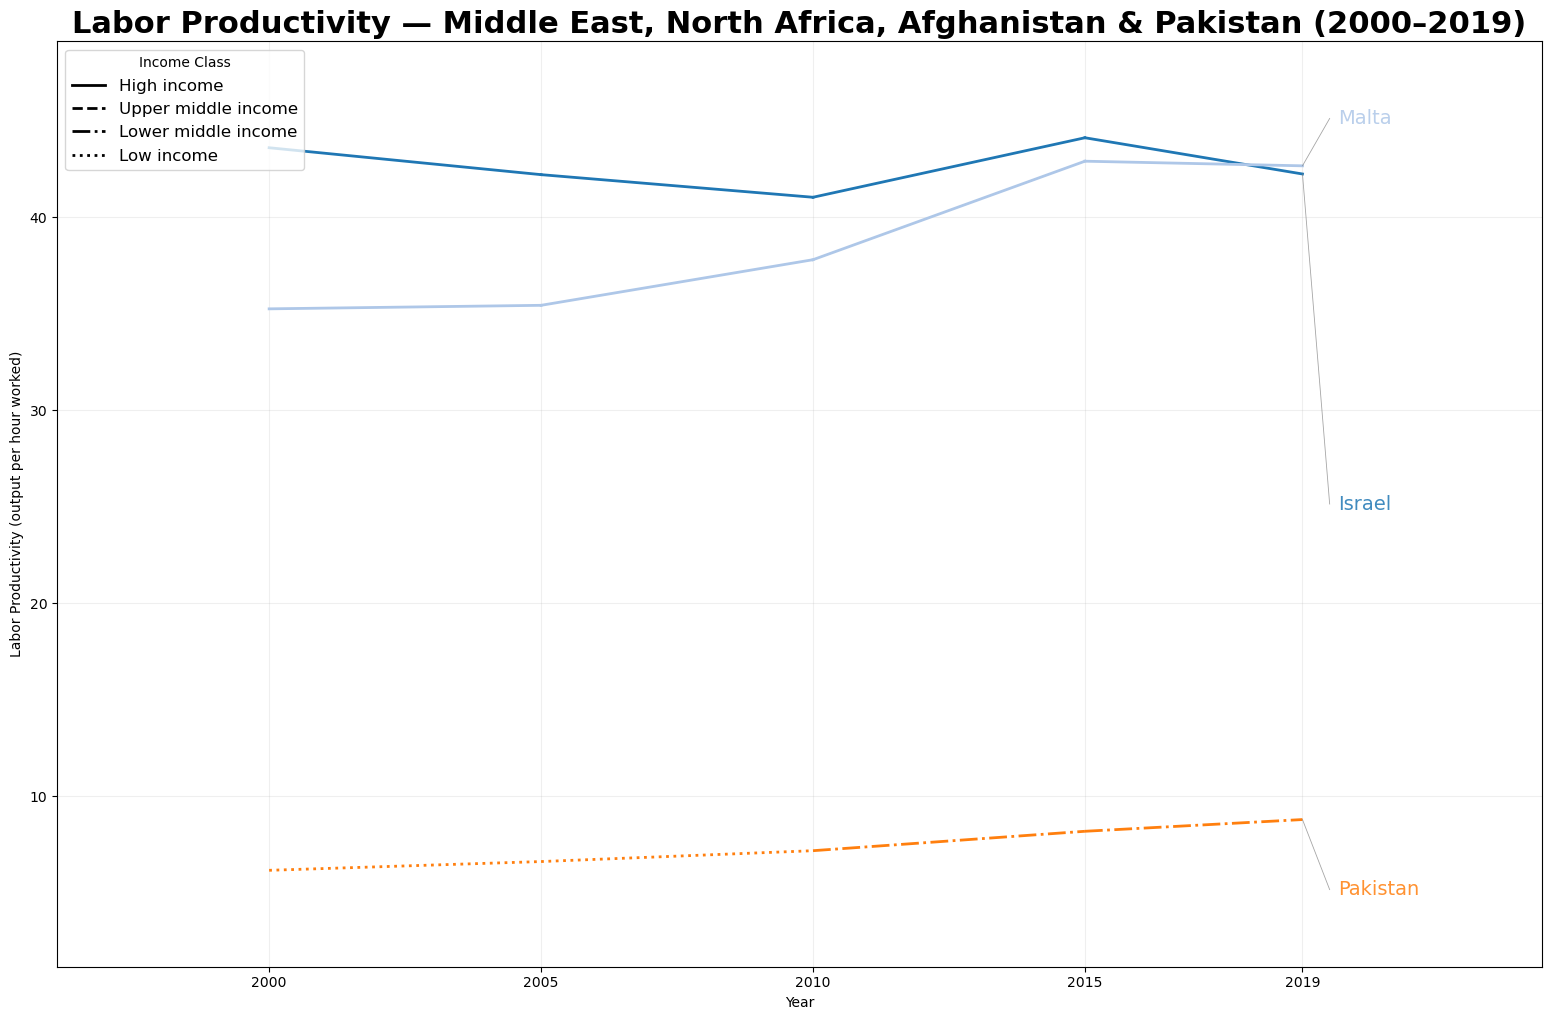

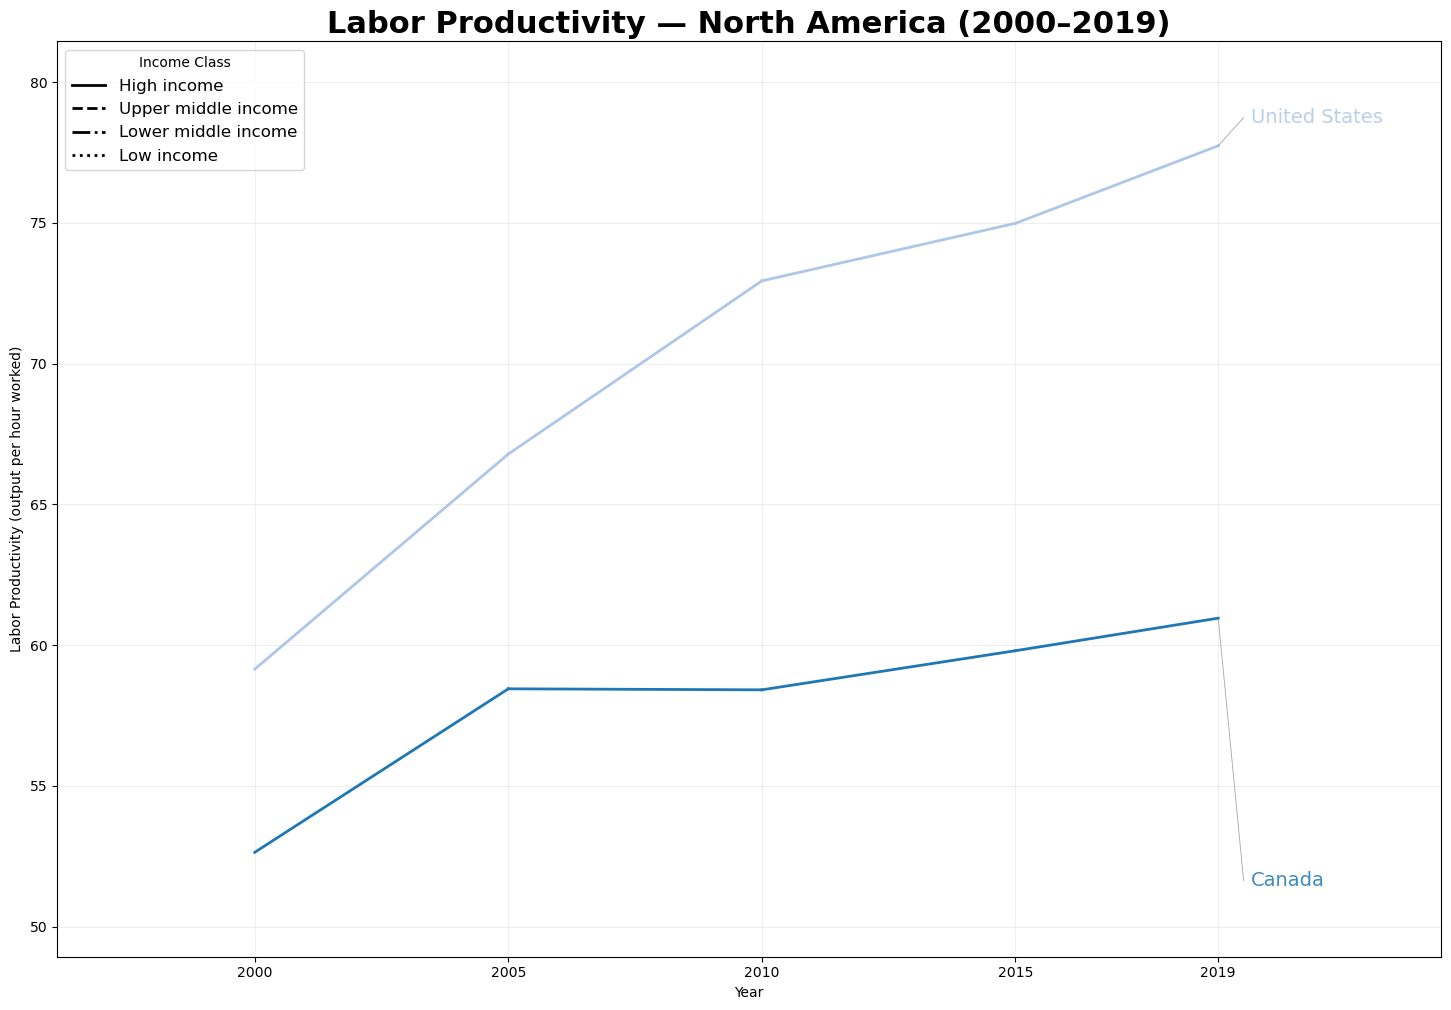

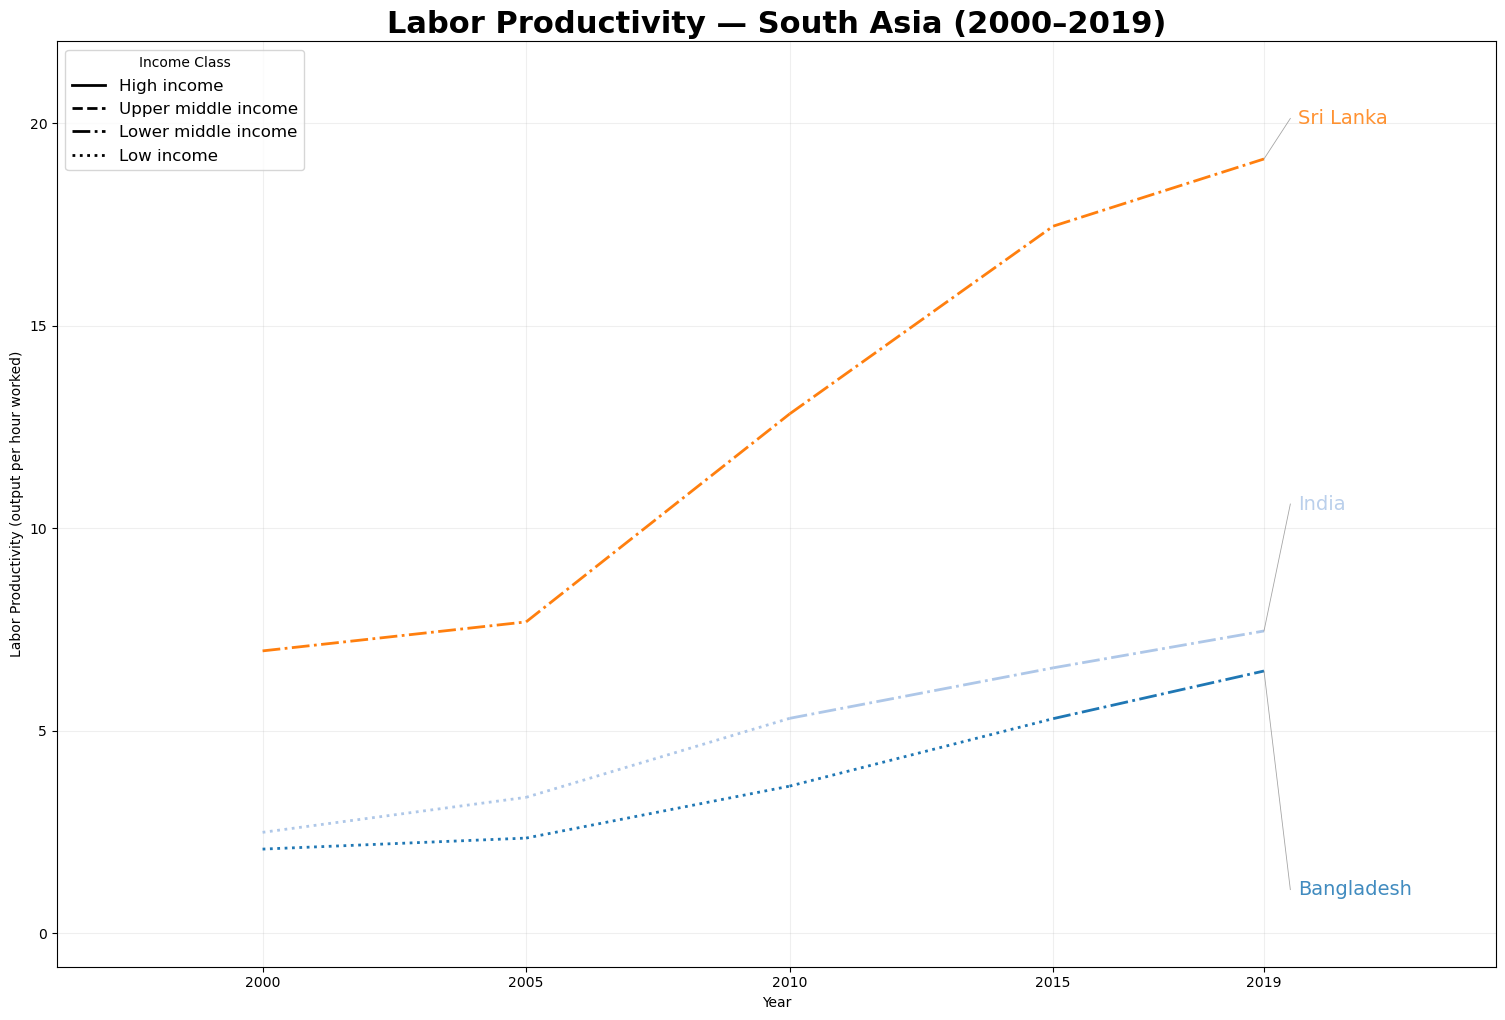

In [18]:
# ===========================
#   Labor Productivity Plot
# ===========================
df2[income_col] = df2[income_col].str.strip().str.lower().map(income_clean_map)

# income class → line style
style_map = {
    "High income": "solid",
    "Upper middle income": "dashed",
    "Lower middle income": "dashdot",
    "Low income": "dotted"
}

# fixed x-axis ticks
year_ticks = [2000, 2005, 2010, 2015, 2019]

# Ensure correct ordering and income classification per year
df2 = df2.sort_values([region_col, country_col, year_col])
df2[income_col] = df2.groupby(country_col)[income_col].ffill().bfill()

regions = sorted(df2[region_col].unique())

for region_name in regions:

    df_r = df2[df2[region_col] == region_name]
    countries = sorted(df_r[country_col].unique())
    num_countries = len(countries)

    # unique color per country
    color_map = {c: plt.cm.tab20(i % 20) for i, c in enumerate(countries)}

    # ---------------------------------------------------
    # AUTO-FIT FIGURE SIZE BASED ON NUMBER OF COUNTRIES
    # ---------------------------------------------------
    fig_width = 18 + (num_countries * 0.6)
    fig_height = 10 + (num_countries * 0.1)

    plt.figure(figsize=(fig_width, fig_height))

    # get last labor values to sort labels
    last_vals = []
    for country in countries:
        df_c = df_r[df_r[country_col] == country].sort_values(year_col)
        last_vals.append((country, df_c[labor_col].values[-1]))

    last_vals.sort(key=lambda x: x[1])  # ascending sort

    # even vertical spacing for right labels
    label_positions = np.linspace(
        df_r[labor_col].min() - 1,
        df_r[labor_col].max() + 1,
        len(last_vals)
    )

    # ---- PLOT EVERY COUNTRY ----
    for (country, last_val), label_y in zip(last_vals, label_positions):

        df_c = df_r[df_r[country_col] == country].sort_values(year_col)
        years = df_c[year_col].values
        values = df_c[labor_col].values
        incomes = df_c[income_col].values


        # segment-by-segment line style
        for i in range(len(years) - 1):
            plt.plot(
                [years[i], years[i + 1]],
                [values[i], values[i + 1]],
                color=color_map[country],
                linestyle=style_map.get(incomes[i], "solid"),
                linewidth=2
            )
        # ---------- CLEAN POINTER VERSION ----------
        last_x = years[-1]
        last_y = values[-1]

        # shorter pointer
        label_x = years[-1] + 0.5

        # subtle connector
        plt.plot(
            [last_x, label_x],
            [last_y, label_y],
            color="gray",
            linewidth=0.6,
            alpha=0.7
        )

        # label
        plt.text(
            label_x + 0.15, label_y, country,
            fontsize=14, va="center",
            color=color_map[country],
            alpha=0.85
        )
        # -------------------------------------------

    # ---- LEGEND FOR INCOME CLASSES ----
    for name, style in style_map.items():
        plt.plot([], [], linestyle=style, color="black", linewidth=2, label=name)

    plt.legend(title="Income Class", fontsize=12, loc="upper left")

    # ---- TITLES ----
    plt.title(
        f"Labor Productivity — {region_name} (2000–2019)",
        fontsize=22, weight="bold"
    )

    # ---- X-AXIS ----
    plt.xticks(year_ticks, year_ticks)

    plt.xlabel("Year")
    plt.ylabel("Labor Productivity (output per hour worked)")
    plt.grid(alpha=0.2)

    # ---------------------------------------------------
    # AUTO SPACE SO LABELS DON'T GET CUT OFF
    # ---------------------------------------------------
    plt.tight_layout(rect=[0, 0, 0.80, 1])
    plt.margins(x=0.2, y=0.1)

    # SAVE
    safe_region = region_name.replace(" ", "_")
    plt.savefig(f"LABOR_LineRegion_{safe_region}.png", dpi=300, bbox_inches='tight')
    plt.show()


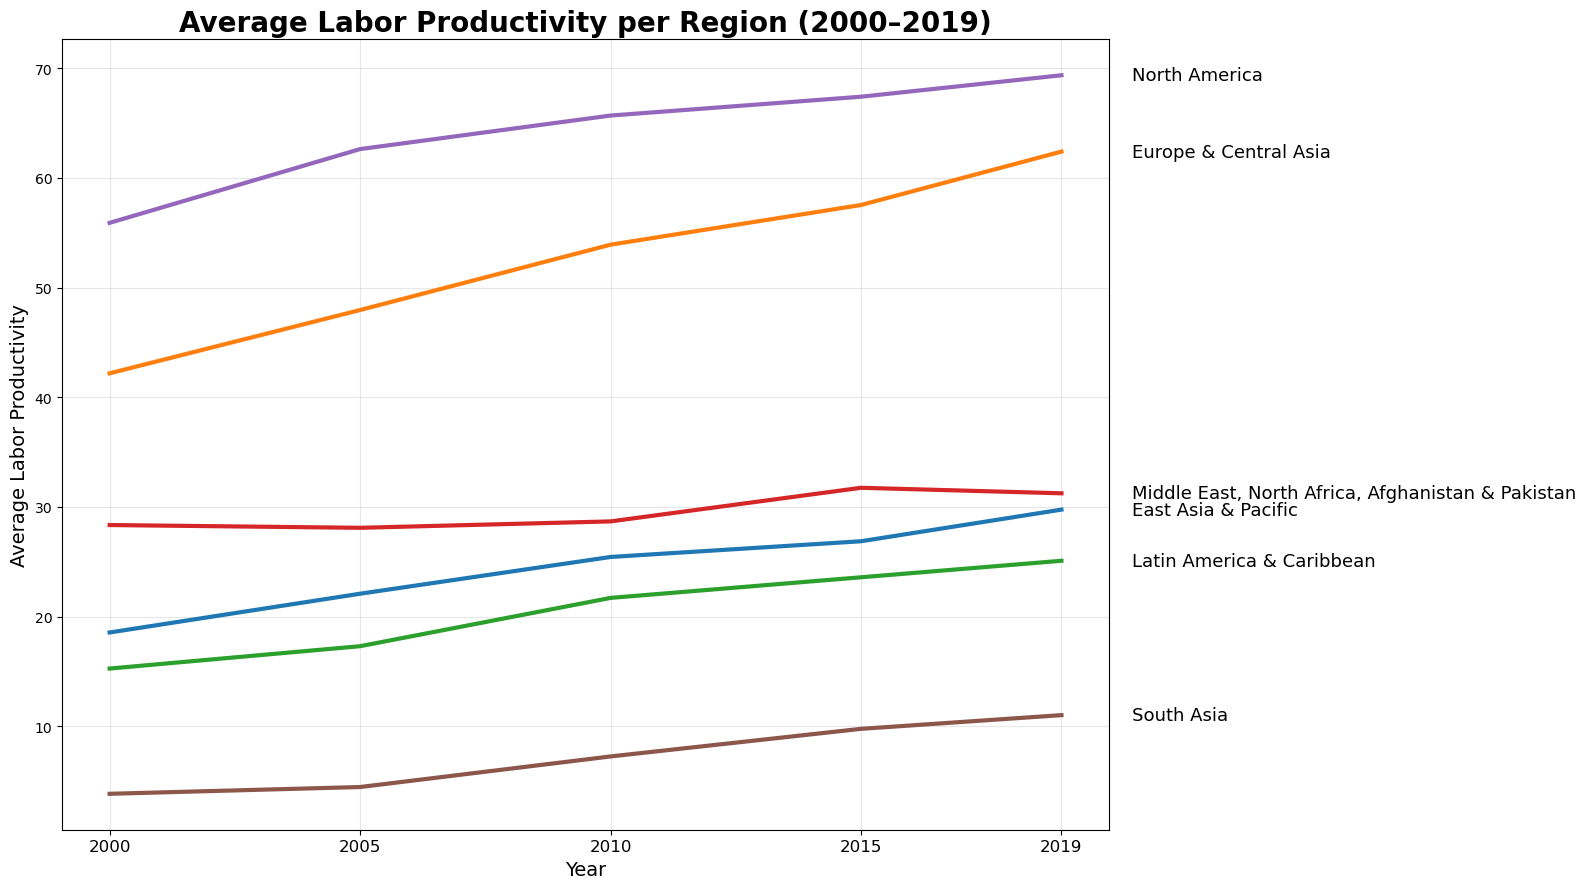

In [35]:
df_avg = (
    df2[df2[year_col].between(2000, 2019)]
    .groupby([region_col, year_col])[labor_col]
    .mean()
    .reset_index()
)

regions = sorted(df_avg[region_col].unique())

# Color map
color_map = {r: plt.cm.tab10(i % 10) for i, r in enumerate(regions)}

plt.figure(figsize=(16, 9))

# For spacing labels on the right side
offset_x = 0.4    # little push to the right
offset_y = 0.0    # centered vertically

for region_name in regions:
    df_r = df_avg[df_avg[region_col] == region_name].sort_values(year_col)

    x = df_r[year_col].values
    y = df_r[labor_col].values

    # plot line
    plt.plot(x, y, color=color_map[region_name], linewidth=3)

    # last point for labeling
    last_x = x[-1]
    last_y = y[-1]

    # TEXT LABEL AT END OF LINE
    plt.text(
        last_x + offset_x + 1,      # push slightly right
        last_y + offset_y,
        region_name,
        fontsize=13,
        va="center",
        color="black",
        weight="normal"
    )

# ==============================
# Axis / Labels / Title
# ==============================
plt.xticks([2000, 2005, 2010, 2015, 2019], fontsize=12)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Labor Productivity", fontsize=14)

plt.title(
    "Average Labor Productivity per Region (2000–2019)",
    fontsize=20, weight="bold"
)

plt.grid(alpha=0.3)

# Remove default legend (labels are on the right side)
plt.tight_layout()

# SAVE
plt.savefig("lpavg_Regional_Averages_2000_2019_LabelRight.png", dpi=300, bbox_inches="tight")
plt.show()


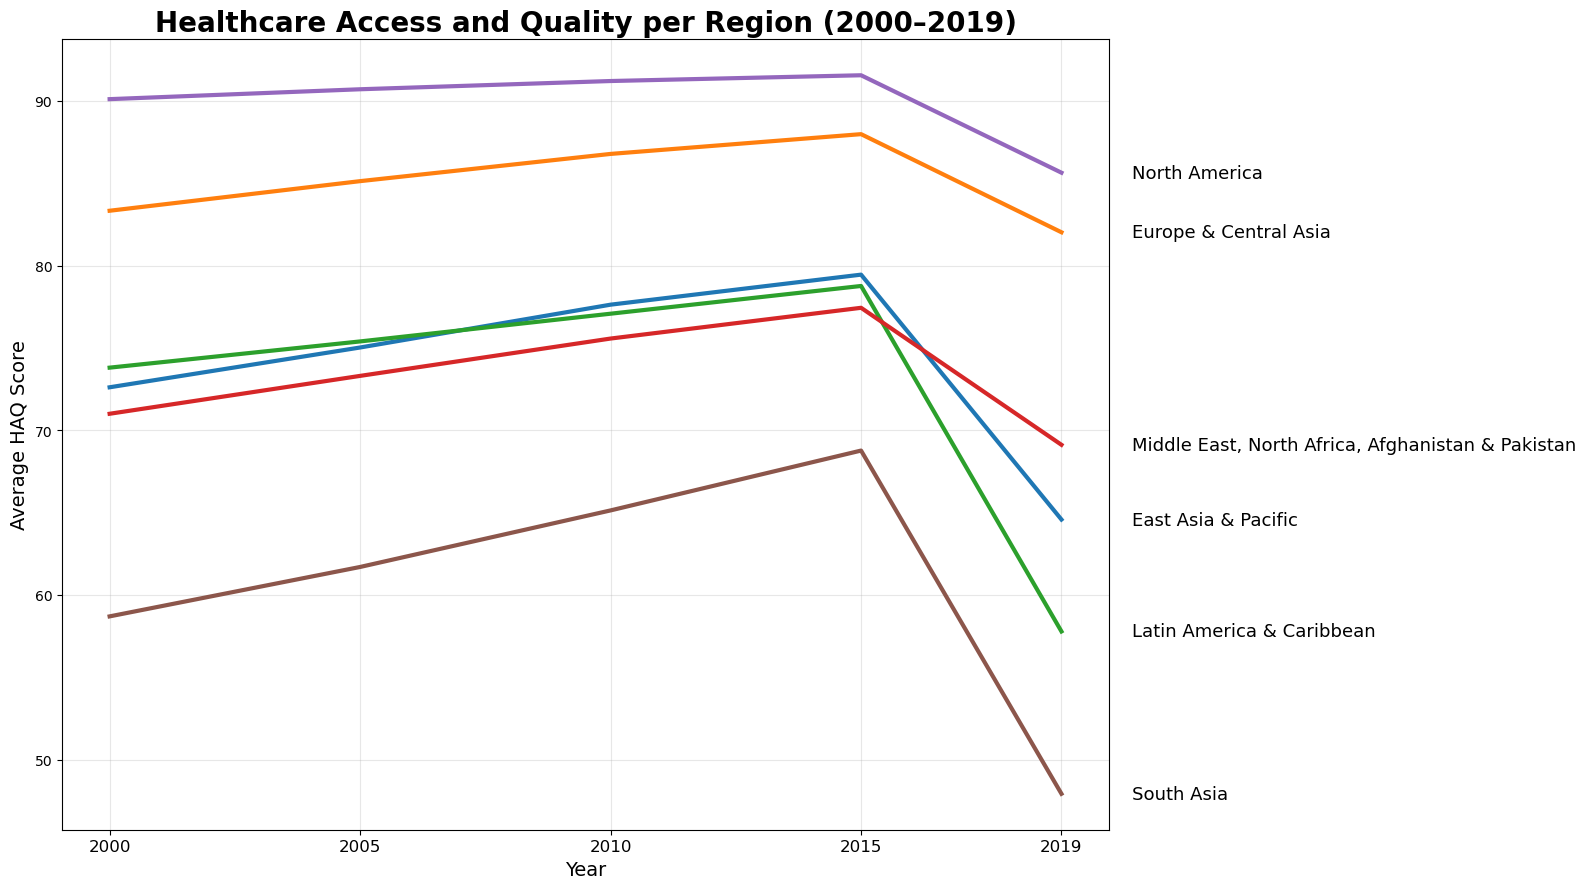

In [34]:
df_avg2 = (
    df[df[year_col].between(2000, 2019)]
    .groupby([region_col, year_col])[haq_col]
    .mean()
    .reset_index()
)

regions = sorted(df_avg2[region_col].unique())

# Color map
color_map = {r: plt.cm.tab10(i % 10) for i, r in enumerate(regions)}

plt.figure(figsize=(16, 9))

# For spacing labels on the right side
offset_x = 0.4    # little push to the right
offset_y = 0.0    # centered vertically

for region_name in regions:
    df_r = df_avg2[df_avg2[region_col] == region_name].sort_values(year_col)

    x = df_r[year_col].values
    y = df_r[haq_col].values

    # plot line
    plt.plot(x, y, color=color_map[region_name], linewidth=3)

    # last point for labeling
    last_x = x[-1]
    last_y = y[-1]

    # TEXT LABEL AT END OF LINE
    plt.text(
        last_x + offset_x + 1,      # push slightly right
        last_y + offset_y,
        region_name,
        fontsize=13,
        va="center",
        color="black",
        weight="normal"
    )

# ==============================
# Axis / Labels / Title
# ==============================
plt.xticks([2000, 2005, 2010, 2015, 2019], fontsize=12)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average HAQ Score", fontsize=14)

plt.title(
    "Healthcare Access and Quality per Region (2000–2019)",
    fontsize=20, weight="bold"
)

plt.grid(alpha=0.3)

# Remove default legend (labels are on the right side)
plt.tight_layout()

# SAVE
plt.savefig("haqavg_Regional_Averages_2000_2019_LabelRight.png", dpi=300, bbox_inches="tight")
plt.show()
